In [1]:
import os
os.getcwd()

'/Users/jinyanxiang/Desktop/Data Science/Udacity/Data Scientist/Project1_AirBnB'

## Business Question
### The key business I would like to explore with this dataset is what predicts price? This big question can be boiled down to three questions:
### 1) How do host-related factors (e.g., host rating) affect price?
### 2) How do the accomodation factors (e.g. room type) affect price?
### 3) How do the enviromental factors (e.g.,city, state) affect price? This question is related to my ongoing research on the influence of inequality on consumers' engagement in the sharing economy.

### To answer these questions, I collected Airbnb listing data from 31 American cities on Kaggle (<i> source: http://insideairbnb.com/get-the-data/, dictionary and assumptions can be found there<i>) combine it with socieconomic data retrieved from the Census Bureau.

## Import libraries

In [309]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white", palette="pastel")

import urllib.request

import gzip
import shutil

from sklearn import linear_model
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

## Download Airbnb data from Kaggle

In [3]:
#define a function to download, upzip and save files amd save Airbnb files by city seperately

def FileDownload(link, city):
    
    ''' INPUT: data link - str
        OUTPUT: save the cvs. file with the city as the file name & delete the zipped file
    '''
    
    zipped_file_name = city + '.csv.gz'
    file_name = city + '.csv'
    
    urllib.request.urlretrieve(link,zipped_file_name)
    
    with gzip.open(zipped_file_name, 'rb') as f_in:
        with open(file_name,'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)
    

    return os.remove(zipped_file_name)

In [4]:
#create a tuples for all cities in interest (24 cities in total)
#link source: http://insideairbnb.com/get-the-data/
City_Link_Tuple = [('http://data.insideairbnb.com/united-states/nc/asheville/2022-06-11/data/listings.csv.gz','Asheville','NC'),
                   ('http://data.insideairbnb.com/united-states/tx/austin/2022-06-08/data/listings.csv.gz','Austin','TX'),
                   ('http://data.insideairbnb.com/united-states/ma/boston/2022-06-13/data/listings.csv.gz','Boston','MA'),
                   ('http://data.insideairbnb.com/united-states/fl/broward-county/2022-06-17/data/listings.csv.gz','Broward','FL'),
                   ('http://data.insideairbnb.com/united-states/ma/cambridge/2022-06-22/data/listings.csv.gz','Cambridge','MA'),
                   ('http://data.insideairbnb.com/united-states/il/chicago/2022-06-10/data/listings.csv.gz','Chicago','IL'),
                   ('http://data.insideairbnb.com/united-states/nv/clark-county-nv/2022-06-13/data/listings.csv.gz','Clark','NV'),
                   ('http://data.insideairbnb.com/united-states/hi/hawaii/2022-09-12/data/listings.csv.gz','Hawaii','HI'),
                   ('http://data.insideairbnb.com/united-states/oh/columbus/2022-06-20/data/listings.csv.gz','Columbus','OH'),
                   ('http://data.insideairbnb.com/united-states/tx/dallas/2022-08-13/data/listings.csv.gz','Dallas','TX'),
                   ('http://data.insideairbnb.com/united-states/co/denver/2022-06-27/data/listings.csv.gz','Denver','CO'),
                   ('http://data.insideairbnb.com/united-states/tx/fort-worth/2022-06-08/data/listings.csv.gz','Fort Worth','TX'),
                   ('http://data.insideairbnb.com/united-states/nj/jersey-city/2022-06-15/data/listings.csv.gz','Jersey City','NJ'),
                   ('http://data.insideairbnb.com/united-states/ca/los-angeles/2022-09-09/data/listings.csv.gz','Los Angeles','CA'),
                   ('http://data.insideairbnb.com/united-states/tn/nashville/2022-06-13/data/listings.csv.gz','Nashville','TN'),
                   ('http://data.insideairbnb.com/united-states/la/new-orleans/2022-09-09/data/listings.csv.gz','New Orleans','LA'),
                   ('http://data.insideairbnb.com/united-states/ny/new-york-city/2022-09-07/data/listings.csv.gz','New York City','NY'),
                   ('http://data.insideairbnb.com/united-states/nj/newark/2022-06-27/data/listings.csv.gz','Newark','NJ'),
                   ('http://data.insideairbnb.com/united-states/ca/oakland/2022-06-15/data/listings.csv.gz','Oakland','CA'),
                   ('http://data.insideairbnb.com/united-states/ca/pacific-grove/2022-06-19/data/listings.csv.gz','Pacific Grove','CA'),
                   ('http://data.insideairbnb.com/united-states/or/portland/2022-06-14/data/listings.csv.gz','Portland','OR'),
                   ('http://data.insideairbnb.com/united-states/ri/rhode-island/2022-06-29/data/listings.csv.gz','Rhode Island','RI'),
                   ('http://data.insideairbnb.com/united-states/or/salem-or/2022-06-15/data/listings.csv.gz','Salem','OR'),
                   ('http://data.insideairbnb.com/united-states/ca/san-diego/2022-06-15/data/listings.csv.gz','San Diego','CA'),
                   ('http://data.insideairbnb.com/united-states/ca/san-francisco/2022-09-07/data/listings.csv.gz','San Francisco','CA'),
                   ('http://data.insideairbnb.com/united-states/ca/san-mateo-county/2022-06-15/data/listings.csv.gz','San Mateo','CA'),
                   ('http://data.insideairbnb.com/united-states/ca/santa-clara-county/2022-06-15/data/listings.csv.gz','Santa Clara','CA'),
                   ('http://data.insideairbnb.com/united-states/ca/santa-cruz-county/2022-06-27/data/listings.csv.gz','Santa Cruz','CA'),
                   ('http://data.insideairbnb.com/united-states/wa/seattle/2022-06-15/data/listings.csv.gz','Seattle','WA'),
                   ('http://data.insideairbnb.com/united-states/mn/twin-cities-msa/2022-09-16/data/listings.csv.gz','Twin Cities MSA','MN'),
                   ('http://data.insideairbnb.com/united-states/dc/washington-dc/2022-06-11/data/listings.csv.gz','Washington, D.C.','DC')]

In [5]:
#download, unzip and store the dataframes
for i in  City_Link_Tuple:
    FileDownload(i[0],i[1])

In [6]:
#check the number of columns for all city dataframes
ncols = []

for i in City_Link_Tuple:
    file_name = i[1]+'.csv'
    
    df = pd.read_csv(file_name)
    
    ncols.append((i[1],df.shape[1]))

In [7]:
ncols
#clearly, these dataframes do not have the same number of columns

[('Asheville', 74),
 ('Austin', 74),
 ('Boston', 74),
 ('Broward', 74),
 ('Cambridge', 74),
 ('Chicago', 74),
 ('Clark', 74),
 ('Hawaii', 75),
 ('Columbus', 74),
 ('Dallas', 75),
 ('Denver', 74),
 ('Fort Worth', 74),
 ('Jersey City', 74),
 ('Los Angeles', 75),
 ('Nashville', 74),
 ('New Orleans', 75),
 ('New York City', 75),
 ('Newark', 74),
 ('Oakland', 74),
 ('Pacific Grove', 74),
 ('Portland', 74),
 ('Rhode Island', 74),
 ('Salem', 74),
 ('San Diego', 74),
 ('San Francisco', 75),
 ('San Mateo', 74),
 ('Santa Clara', 74),
 ('Santa Cruz', 74),
 ('Seattle', 74),
 ('Twin Cities MSA', 75),
 ('Washington, D.C.', 74)]

In [650]:
#check out the dataframes and select variables in interest

#identifier for listings and hosts and year information
basics = ['id','host_id','calendar_last_scraped','neighbourhood','latitude','longitude']

#the key outcome variable is PRICE
dv = ['price']

#possible features that predict price
ivs = ['host_since','host_response_time', 'host_response_rate','host_acceptance_rate','host_is_superhost',
       'host_listings_count','host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
        'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms','beds',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365',  'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d','reviews_per_month',
       'first_review','last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']

In [9]:
all_var = basics + dv + ivs

In [10]:
#impute state and city information based on the Kaggle's data description with the assumption that its data is correct

def DataProcess(city,state):
    ''' INPUT: city, state - strings
        OUTPUT: save the updated cvs. file with the city as the file name (selected columns and added city and state information)
    '''
    file_name = city + '.csv'
    
    df = pd.read_csv(file_name)
    df_new = df[all_var]
    
    df_new['city'] = np.repeat(city,df_new.shape[0])
    df_new['state'] = np.repeat(state,df_new.shape[0])
    
    return df_new.to_csv(file_name,index = False)

In [11]:
for i in  City_Link_Tuple:
    DataProcess(i[1],i[2])

In [12]:
#concat these files to create a master file
df_airbnb = pd.DataFrame()

for i in City_Link_Tuple:
    df_name = i[1]+'.csv'
    df = pd.read_csv(df_name)

    
    df_airbnb = df_airbnb.append(df)

In [13]:
df_airbnb.to_csv('df_airbnb_original.csv', index = False)

## Preliminary Data Wrangling on ```df_airbnb```

In [572]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270658 entries, 0 to 270657
Data columns (total 57 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            270658 non-null  int64  
 1   host_id                                       270658 non-null  int64  
 2   calendar_last_scraped                         270658 non-null  object 
 3   neighbourhood                                 168311 non-null  object 
 4   latitude                                      270658 non-null  float64
 5   longitude                                     270658 non-null  float64
 6   price                                         270658 non-null  object 
 7   host_since                                    269664 non-null  object 
 8   host_response_time                            228522 non-null  object 
 9   host_response_rate                            22

In [573]:
#check duplicated listings
df_airbnb.duplicated(subset = ['id']).value_counts()

False    266081
True       4577
dtype: int64

In [574]:
#drop duplicated listings
df_airbnb.drop_duplicates(subset = ['id'],inplace=True)

In [575]:
#recheck duplicated listings
df_airbnb.duplicated(subset = ['id']).value_counts()

False    266081
dtype: int64

In [576]:
#the data type of price is object with "$" mark
#convert this to float type and remove "$" mark
price_num = lambda i: float("".join(i.split('$')[1].split(",")))
df_airbnb.price = df_airbnb.price.apply(price_num)

In [577]:
df_airbnb[['price']].dtypes

price    float64
dtype: object

In [578]:
#similarly change the type of host_response_rate and host_acceptance rate to float
response_num = lambda i: float(str(i).split('%')[0])
df_airbnb.host_response_rate = df_airbnb.host_response_rate.apply(response_num)
df_airbnb.host_acceptance_rate = df_airbnb.host_acceptance_rate.apply(response_num)

In [579]:
#create new variable - host experience: 1) convert both host_since and calendar_last_scraped to datetime type and 2) calculate the difference in the unit of days, months and years
conver_datetime = lambda time:pd.to_datetime(time)
df_airbnb['calendar_last_scraped'] = df_airbnb['calendar_last_scraped'].apply(conver_datetime)
df_airbnb['host_since'] = df_airbnb['host_since'].apply(conver_datetime)

In [580]:
df_airbnb['host_exp_days'] = (df_airbnb['calendar_last_scraped'] - df_airbnb['host_since'])

In [581]:
get_month = lambda time:time.month
get_year = lambda time:time.year

df_airbnb['host_exp_months'] = (df_airbnb['calendar_last_scraped'].apply(get_year) - df_airbnb['host_since'].apply(get_year))*12 + df_airbnb['calendar_last_scraped'].apply(get_month) - df_airbnb['host_since'].apply(get_month)
df_airbnb['host_exp_years'] = df_airbnb['calendar_last_scraped'].apply(get_year) - df_airbnb['host_since'].apply(get_year) 

In [582]:
df_airbnb.neighbourhood[2] is np.nan

False

In [583]:
df_airbnb.reset_index(drop = True, inplace = True)

In [584]:
#retrive county information from neighbourhood and add it to the dataframe
#impute missing county information with city information collected from Kaggle (assuming it is correct)
county = []

for i, j in enumerate(df_airbnb.neighbourhood):
    if j is np.nan:
        county.append(df_airbnb.city[i])
    else:
        county.append(j.split(',')[0])

df_airbnb['county'] = county

In [585]:
df_airbnb['county'].isna().value_counts()

False    266081
Name: county, dtype: int64

In [586]:
df_airbnb['county'].nunique()

1585

In [587]:
#check columns with nas
df_airbnb[df_airbnb.columns[df_airbnb.isnull().mean()> 0]].isnull().mean()

neighbourhood                  0.379373
host_since                     0.003683
host_response_time             0.157599
host_response_rate             0.157599
host_acceptance_rate           0.125789
host_is_superhost              0.003499
host_listings_count            0.003683
host_total_listings_count      0.003683
host_has_profile_pic           0.003683
host_identity_verified         0.003683
bathrooms                      1.000000
bathrooms_text                 0.002090
bedrooms                       0.084587
beds                           0.015458
minimum_minimum_nights         0.000150
maximum_minimum_nights         0.000150
minimum_maximum_nights         0.000150
maximum_maximum_nights         0.000150
minimum_nights_avg_ntm         0.000150
maximum_nights_avg_ntm         0.000150
calendar_updated               1.000000
reviews_per_month              0.189871
first_review                   0.189871
last_review                    0.189871
review_scores_rating           0.189871


In [588]:
#impute missing ratings and host response/acceptance rates with mean for two reasons:
#1. about 15-20% of missing values and if all of them are dropped, there could be a big loss of data
#2. sd of ratings are small and imputing mean is reasonable
missing_vals = df_airbnb[['review_scores_rating',
                           'review_scores_accuracy', 'review_scores_cleanliness',
                           'review_scores_checkin', 'review_scores_communication',
                           'review_scores_location', 'review_scores_value',
                           'host_response_rate','host_acceptance_rate']]
missing_vals.describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_response_rate,host_acceptance_rate
count,215560.000000,214416.000000,214430.000000,214396.000000,214423.00000,214389.000000,214387.000000,224147.000000,232611.000000
mean,4.725729,4.792532,4.735088,4.849914,4.83592,4.801254,4.696222,96.352528,88.502629
std,0.534504,0.405339,0.437812,0.364109,0.38992,0.358771,0.432079,12.380607,21.852128
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,4.670000,4.760000,4.670000,4.850000,4.83000,4.750000,4.630000,100.000000,89.000000
50%,4.870000,4.920000,4.880000,4.960000,4.96000,4.910000,4.800000,100.000000,98.000000
75%,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,4.940000,100.000000,100.000000
max,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,100.000000,100.000000


In [589]:
fill_mean = lambda col: col.fillna(col.mean()) # mean function


df_airbnb[['review_scores_rating',
          'review_scores_accuracy', 'review_scores_cleanliness',
          'review_scores_checkin', 'review_scores_communication',
          'review_scores_location', 'review_scores_value',
           'host_response_rate','host_acceptance_rate']] = missing_vals.apply(fill_mean, axis=0)

In [590]:
#check columns with nas
df_airbnb[df_airbnb.columns[df_airbnb.isnull().mean()> 0]].isnull().mean()

neighbourhood                0.379373
host_since                   0.003683
host_response_time           0.157599
host_is_superhost            0.003499
host_listings_count          0.003683
host_total_listings_count    0.003683
host_has_profile_pic         0.003683
host_identity_verified       0.003683
bathrooms                    1.000000
bathrooms_text               0.002090
bedrooms                     0.084587
beds                         0.015458
minimum_minimum_nights       0.000150
maximum_minimum_nights       0.000150
minimum_maximum_nights       0.000150
maximum_maximum_nights       0.000150
minimum_nights_avg_ntm       0.000150
maximum_nights_avg_ntm       0.000150
calendar_updated             1.000000
reviews_per_month            0.189871
first_review                 0.189871
last_review                  0.189871
host_exp_days                0.003683
host_exp_months              0.003683
host_exp_years               0.003683
dtype: float64

In [591]:
#impute host response time with mode for two reasons:
#1. about 15  of missing values and if all of them are dropped, there could be a big loss of data
#2. the majority of hosts's response time equal to the mode (77%)
df_airbnb.host_response_time.value_counts()

within an hour        173491
within a few hours     31583
within a day           15720
a few days or more      3353
Name: host_response_time, dtype: int64

In [592]:
fill_mode = lambda x:np.where(x is np.nan, 'within an hour', x)
df_airbnb.host_response_time = df_airbnb.host_response_time.apply(fill_mode)

In [593]:
#check columns with nas
df_airbnb[df_airbnb.columns[df_airbnb.isnull().mean()> 0]].isnull().mean()

neighbourhood                0.379373
host_since                   0.003683
host_is_superhost            0.003499
host_listings_count          0.003683
host_total_listings_count    0.003683
host_has_profile_pic         0.003683
host_identity_verified       0.003683
bathrooms                    1.000000
bathrooms_text               0.002090
bedrooms                     0.084587
beds                         0.015458
minimum_minimum_nights       0.000150
maximum_minimum_nights       0.000150
minimum_maximum_nights       0.000150
maximum_maximum_nights       0.000150
minimum_nights_avg_ntm       0.000150
maximum_nights_avg_ntm       0.000150
calendar_updated             1.000000
reviews_per_month            0.189871
first_review                 0.189871
last_review                  0.189871
host_exp_days                0.003683
host_exp_months              0.003683
host_exp_years               0.003683
dtype: float64

In [594]:
#drop listings with missing host_is_superhost, host_exp_years, bedrooms, beds which will be key predictors
df_airbnb.dropna(subset=['host_is_superhost', 'bedrooms','beds','host_exp_years'],inplace = True)

In [595]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239214 entries, 0 to 266080
Data columns (total 61 columns):
 #   Column                                        Non-Null Count   Dtype          
---  ------                                        --------------   -----          
 0   id                                            239214 non-null  int64          
 1   host_id                                       239214 non-null  int64          
 2   calendar_last_scraped                         239214 non-null  datetime64[ns] 
 3   neighbourhood                                 149303 non-null  object         
 4   latitude                                      239214 non-null  float64        
 5   longitude                                     239214 non-null  float64        
 6   price                                         239214 non-null  float64        
 7   host_since                                    239214 non-null  datetime64[ns] 
 8   host_response_time                          

In [596]:
df_airbnb.to_csv('df_airbnb_cleaned.csv', index = False)

## Further data wrangling for visualization statistical analysis

In [651]:
#identify the predictors in interest
predictors_host_related_cat = ['host_response_time', # four types: <= 1h, <= few hs, <= day, >= days, predict the shorter, the higher price; note that 'host_response_rate' is not included as it lacks variablity (99% are 100% response rate)
                               'host_is_superhost', #predicts super host has a positive impact on price
                               'host_identity_verified'] #predicts a verified identity has a positive impact on price

predictors_host_related_quan = ['host_acceptance_rate', #no a-priori prediction and not visable to guests
                                'host_exp_years'] #predict a positive impact on price



predictors_room_related_cat = ['property_type', 'has_availability',
                               'room_type', #four types: Entire place, Private room, Shared room, Hotel room, predict entire place > private room > hootel room >> shared room in terms of price
                               'instant_bookable',] #predict instantly bookable listings has higher price due to flexibility
                               

    
predictors_room_related_quan = ['accommodates', #the maximum capacity of the listing, predict a positive impact on price
                                'beds','bedrooms', #similiar to accommodates
                                'minimum_nights', #the minimum stay requirement, suggesting low flexibility, predict a negative impact on price
                                'maximum_nights', #the maximum stay requirement, no a-priori prediction
                                'availability_30', #suggests the demand and predict a positive impact on price
                                'availability_60', 'availability_90','availability_365', #similiar to availability_30 but may have smaller influence
                                'number_of_reviews', #it may interact with the review rating
                                'review_scores_rating','review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location'] #all rating related, predict negative impacts on price


predictors_en_related_cat = ['city', 'state'] #no a-priori prediction

In [598]:
#check the categorical variables
def CheckCatVar(var, seq):
    print('\033[1m' + str(seq) + " " + var + '\033[0m')
    print('\n')
    print(df_airbnb[var].value_counts())
    print('\n')

In [599]:
for i, j in enumerate (predictors_host_related_cat+predictors_room_related_cat):
    CheckCatVar(j, i+1)

1 host_response_time


within an hour        193719
within a few hours     28417
within a day           14181
a few days or more      2897
Name: host_response_time, dtype: int64


2 host_is_superhost


f    159109
t     80105
Name: host_is_superhost, dtype: int64


3 host_identity_verified


t    201467
f     37747
Name: host_identity_verified, dtype: int64


4 property_type


Entire rental unit             54377
Entire home                    51441
Entire condo                   32300
Private room in home           23550
Private room in rental unit    16102
                               ...  
Shared room in dome                1
Shared room in pension             1
Private room in tower              1
Holiday park                       1
Private room in ice dome           1
Name: property_type, Length: 134, dtype: int64


5 has_availability


t    225803
f     13411
Name: has_availability, dtype: int64


6 room_type


Entire home/apt    177448
Private room        58328
Shared room   

In [600]:
#there are 117 property types and needs further check
pd.set_option('display.max_rows', 200)
df_airbnb.property_type.value_counts()
#pd.DataFrame().reset_index().sort_values(by = 'index')

Entire rental unit                    54377
Entire home                           51441
Entire condo                          32300
Private room in home                  23550
Private room in rental unit           16102
Entire guest suite                     7806
Entire townhouse                       7343
Entire serviced apartment              5684
Entire guesthouse                      5365
Room in hotel                          3246
Private room in townhouse              3144
Private room in condo                  2750
Entire villa                           2448
Room in boutique hotel                 2192
Entire loft                            2126
Entire cottage                         2007
Entire bungalow                        1816
Private room in resort                 1807
Private room in guest suite            1400
Private room in bed and breakfast      1094
Shared room in home                     924
Shared room in rental unit              880
Entire cabin                    

In [601]:
#based on the check, there are two issues with property_type: 1) it combines room types and property type and 2) it has some less common property types
#to solve the issues, I decide recategorize property type and group the less common types as others

property_type_new = []

for i in df_airbnb.property_type:
    if 'rental unit' in i:
        property_type_new.append('rental unit')
    elif 'home' in i:
        property_type_new.append('home')
    elif 'apartment' in i:
        property_type_new.append('apartment')
    elif 'townhouse' in i:
        property_type_new.append('townhouse')
    elif 'guesthouse' in i:
        property_type_new.append('guest house')
    elif 'guest suite' in i:
        property_type_new.append('guestsuite')
    elif 'condo' in i:
        property_type_new.append('condo')
    elif ('hotel' or 'aparthotel' or 'hosel') in i:
        property_type_new.append('hotel')
    elif 'cottage' in i:
        property_type_new.append('gcottage')
    elif 'villa' in i:
        property_type_new.append('villa')
    else:
         property_type_new.append('others')

In [602]:
df_airbnb['property_type_new'] = property_type_new

In [603]:
df_airbnb.property_type_new.value_counts()

home           77590
rental unit    71359
condo          35155
others         12304
townhouse      10545
guestsuite      9232
apartment       6193
hotel           5824
guest house     5772
villa           3123
gcottage        2117
Name: property_type_new, dtype: int64

In [604]:
#recode t/f variables
def Recode(df, var, true_name, false_name):
    '''
    INPUT:
    df - dataframe for visualization
    var - the target categorical variable for recoding
    true_name - new label for true values
    false_name - new label for false values
    
    OUTPUT: A histogram that visualize the distribution of listings by the target categorical variable
    '''
    recode = lambda x: np.where(x == 't', true_name, false_name)
    df[var] = df[var].apply(recode)

In [605]:
#recode host_is_superhost
Recode(df_airbnb, 'host_is_superhost', 'No', 'Yes')

In [606]:
#recode host_identity_verified
Recode(df_airbnb, 'host_identity_verified', 'No', 'Yes')

In [607]:
#recode instant_bookable
Recode(df_airbnb, 'instant_bookable', 'instant bookable', 'instant not bookable')

In [608]:
#check distributions of price 
def Hist(df, var, binsize, title):
    '''
    INPUT:
    df - dataframe for visualization
    var - the target categorical variable for visualization
    binszie - the bin size for the figure
    title - the title for the figure
    
    OUTPUT: A histogram that visualize the distribution of listings by the target categorical variable
    '''
    
    plt.figure(figsize=[20, 10])
    
    sns.histplot(data = df, x = var ,bins = binsize)
    
    min_x = df[var].min()
    max_x = df[var].max()
    
    plt.xlim = ([min_x,max_x])
    
    plt.xlabel("")
    plt.ylabel('Frequency', fontsize = 18)

    plt.title(title, fontsize = 22)
    
    return plt.show()

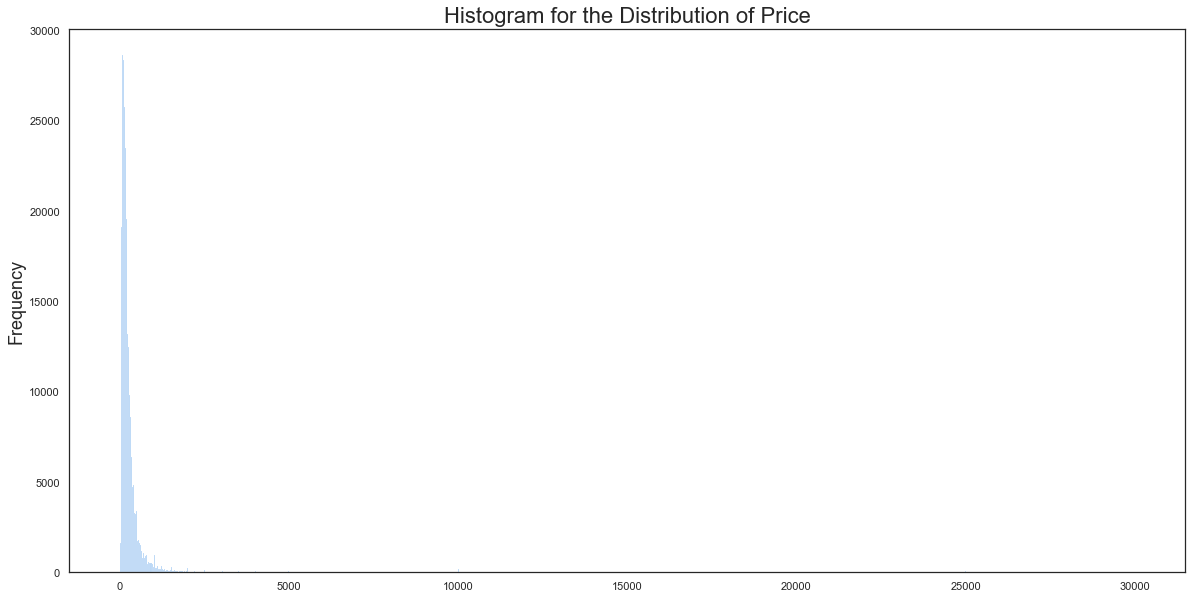

In [609]:
Hist(df_airbnb, 'price', 1000, 'Histogram for the Distribution of Price')

In [610]:
#per the histogram and box plot, there are some extereme outliers on the right tail
#to adress these outlier issues and skewness, take log transformation of price and drop the top  outliers (N = 2392)
#take log to address the skewness
take_log = lambda i: np.log10(i+1)
df_airbnb['log_price'] = df_airbnb.price.apply(take_log)

In [621]:
df_airbnb.shape[0]*1/100

2392.14

In [622]:
percentile_99 = np.percentile(df_airbnb.price, 99)
percentile_99

1909.0

In [624]:
df_master = df_airbnb.query('price <= 1909')

In [625]:
df_master.price.describe()

count    236823.000000
mean        237.320539
std         231.809020
min           0.000000
25%          99.000000
50%         167.000000
75%         286.000000
max        1909.000000
Name: price, dtype: float64

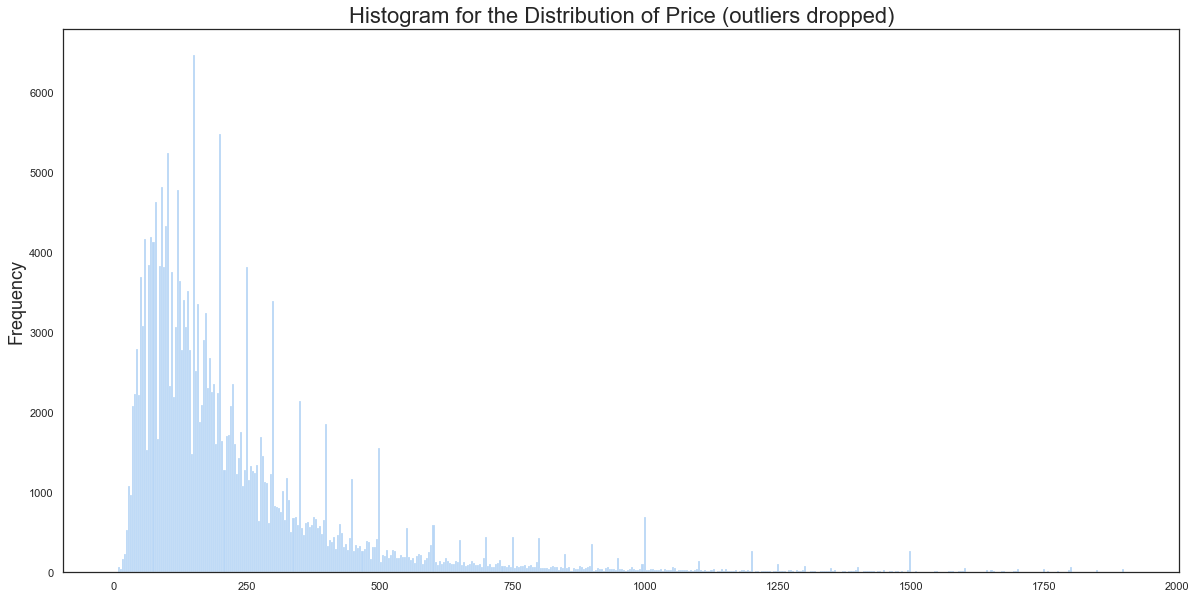

In [626]:
#recheck the distributions
Hist(df_master, 'price', 500, 'Histogram for the Distribution of Price (outliers dropped)')

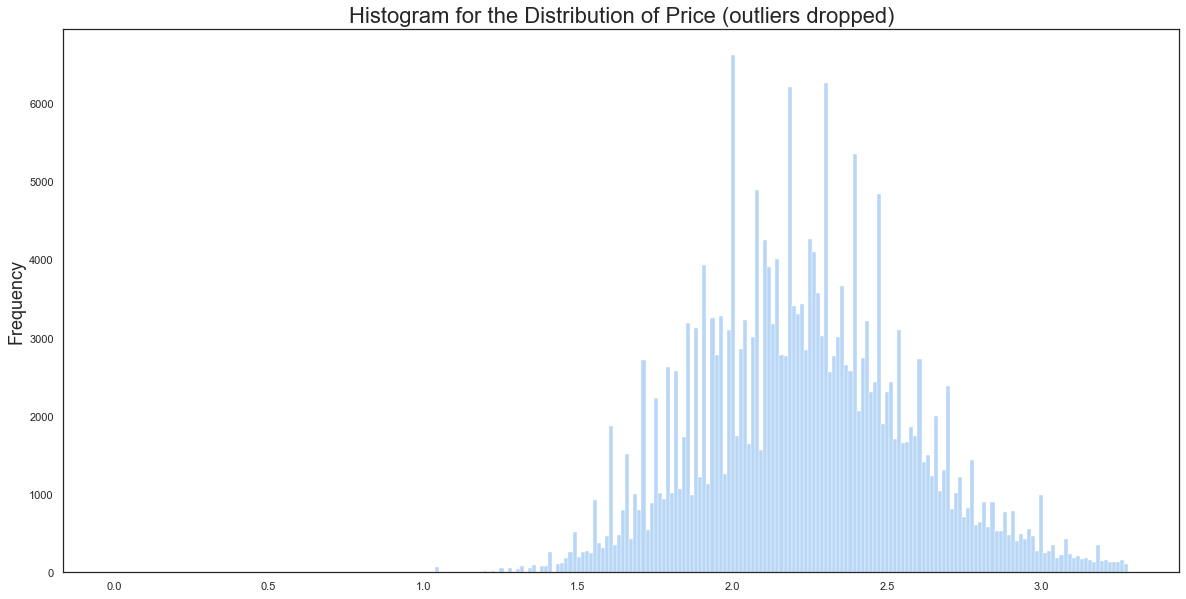

In [627]:
#recheck the distributions
Hist(df_master, 'log_price', 250, 'Histogram for the Distribution of Price (outliers dropped)')

In [628]:
df_master.to_csv('df_master_new.csv', index = False)

In [629]:
print('N of listings ', df_master.shape[0])
print('N of cities ', len(df_master.city.unique()))
print('N of states ',len(df_master.state.unique()))
print('the earliest date ',df_master.calendar_last_scraped.min())
print('the lastest date ',df_master.calendar_last_scraped.max())

N of listings  236823
N of cities  31
N of states  19
the earliest date  2022-06-08 00:00:00
the lastest date  2022-09-16 00:00:00


------

### Data summary: 
#### After data wrangling, the dataset has 236,823 unique listings in 31 cities and 19 states in the United States between 2022-06-08 to 2022-09-16.

------

## Model-free Statistical/Virsual Exploration

In [630]:
#check the distribution of listings by some categorical variables

def CatDistribution(df, var, var_name, rotation, title):
    
    '''
    INPUT:
    df - dataframe used for visualization
    var - the target categorical variable for visualization
    var_name - x label for the target categorical variable
    rotation - the rotation angle for x labels
    title - title of the chart
    
    OUTPUT: a bar chart that visualize the distribution of listings by the target categorical variable
    '''
    plt.figure(figsize=[20, 10])
    
    df_temp = df[var].value_counts().rename_axis(var).reset_index(name = 'Counts').sort_values(by = 'Counts', ascending = False)
    chart = sns.barplot(data = df_temp, x = var, y = 'Counts')
    
    
    plt.xlabel(var_name, fontsize = 18)
    plt.ylabel('Frequency', fontsize = 18)
    plt.xticks(range(len(list(df_temp[var]))), list(df_temp[var]), rotation = rotation, fontweight = 'bold', fontsize = 14)
    
    plt.title(title, fontsize = 22)

    for p in chart.patches:
        height = p.get_height()
        chart.text(x = p.get_x()+(p.get_width()/2),
                y = height+1,
                s = '{:.0f}'.format(height),
                fontsize= 12,
                ha = 'center') 
    
    return plt.show()

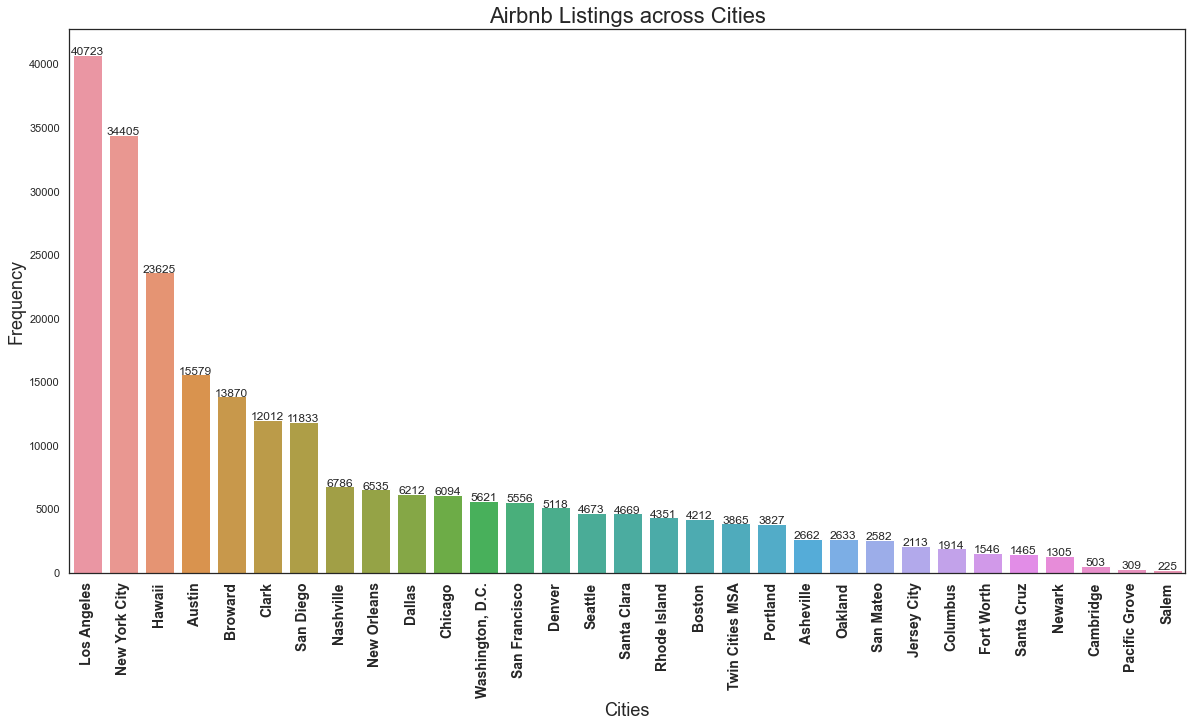

In [631]:
#by city
CatDistribution(df_master, 'city', 'Cities', 90, 'Airbnb Listings across Cities')

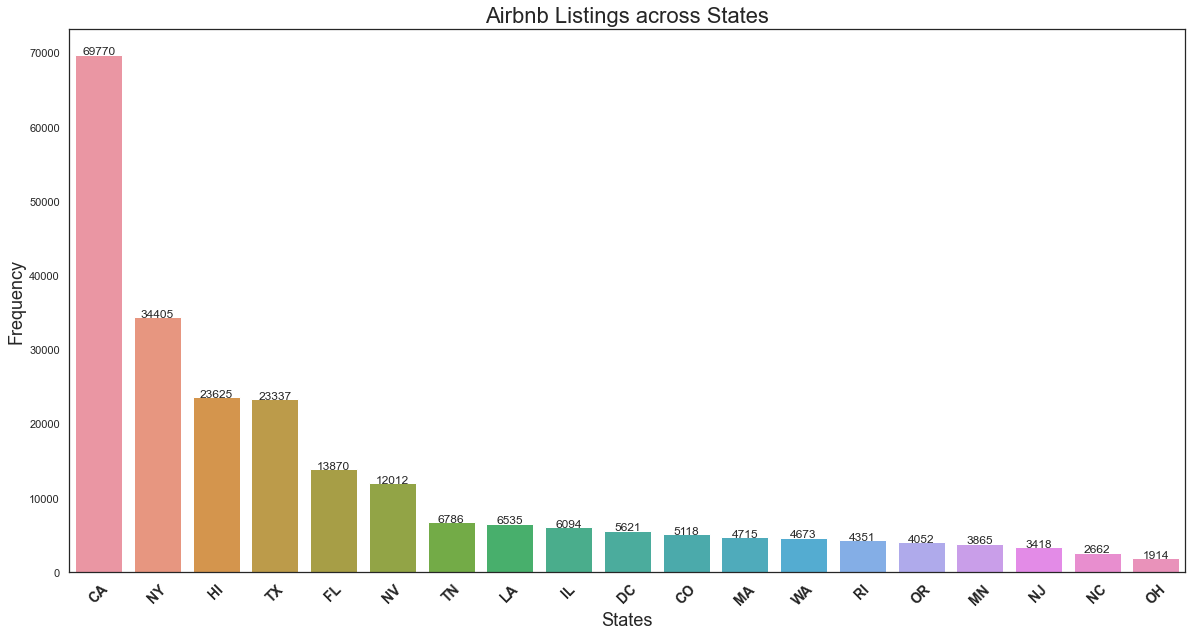

In [632]:
#by state
CatDistribution(df_master, 'state', 'States', 45, 'Airbnb Listings across States')

In [633]:
#Conclusions from the two bar charts: 1) cities with most airbnb listings are LA, NYC and Austin and 2) states with most airbnb listings are CA, NY and TX, CA has more than doubled of listings compared to the second-ranked state - NY

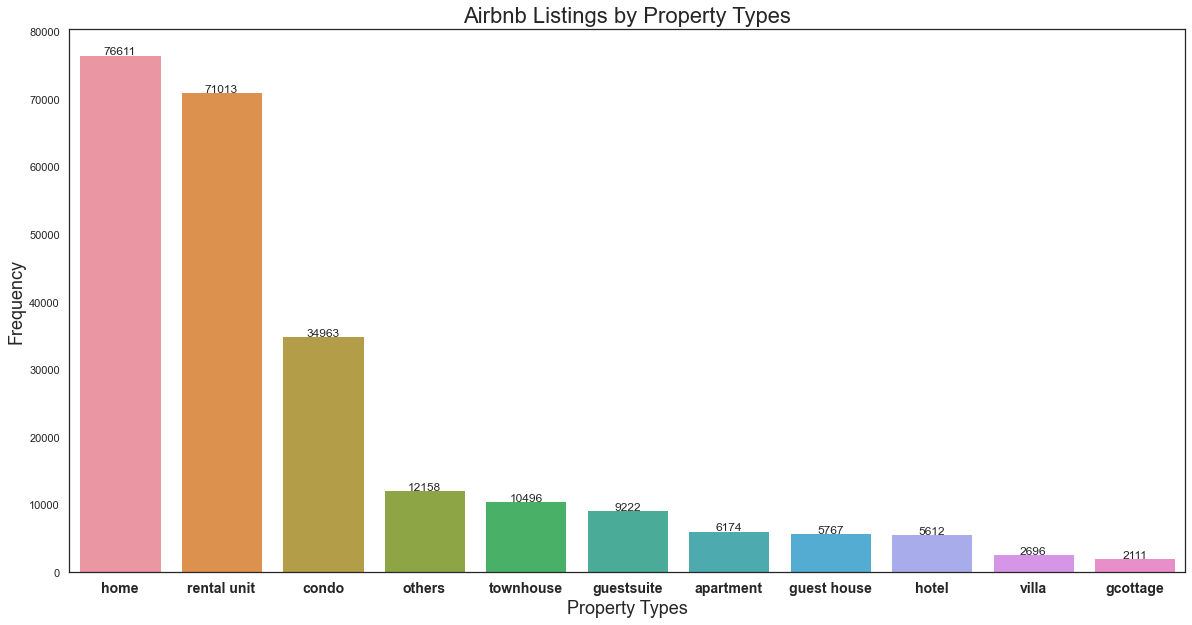

In [634]:
#by property type
CatDistribution(df_master, 'property_type_new', 'Property Types', 0, 'Airbnb Listings by Property Types')

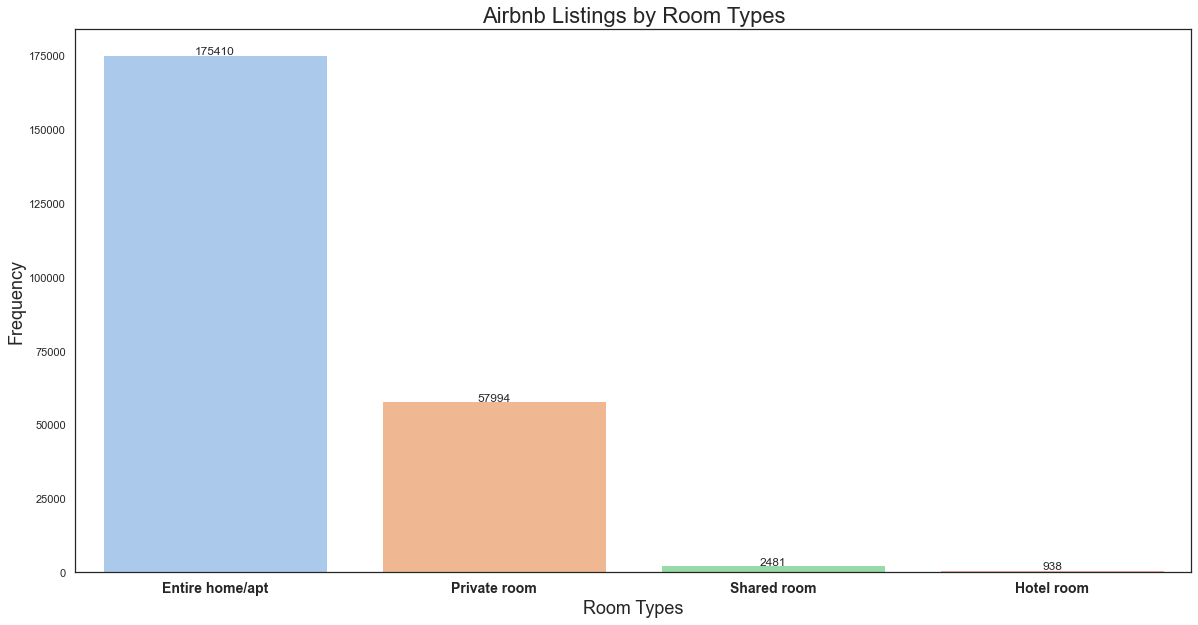

In [635]:
#by room type
CatDistribution(df_master, 'room_type', 'Room Types', 0, 'Airbnb Listings by Room Types')

In [638]:
df_master.columns

Index(['id', 'host_id', 'calendar_last_scraped', 'neighbourhood', 'latitude',
       'longitude', 'price', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms',
       'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'reviews_per_month', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cl

In [113]:
#Conclusion: most listings in the dataset are entire home/apt (room type) and home (property type)

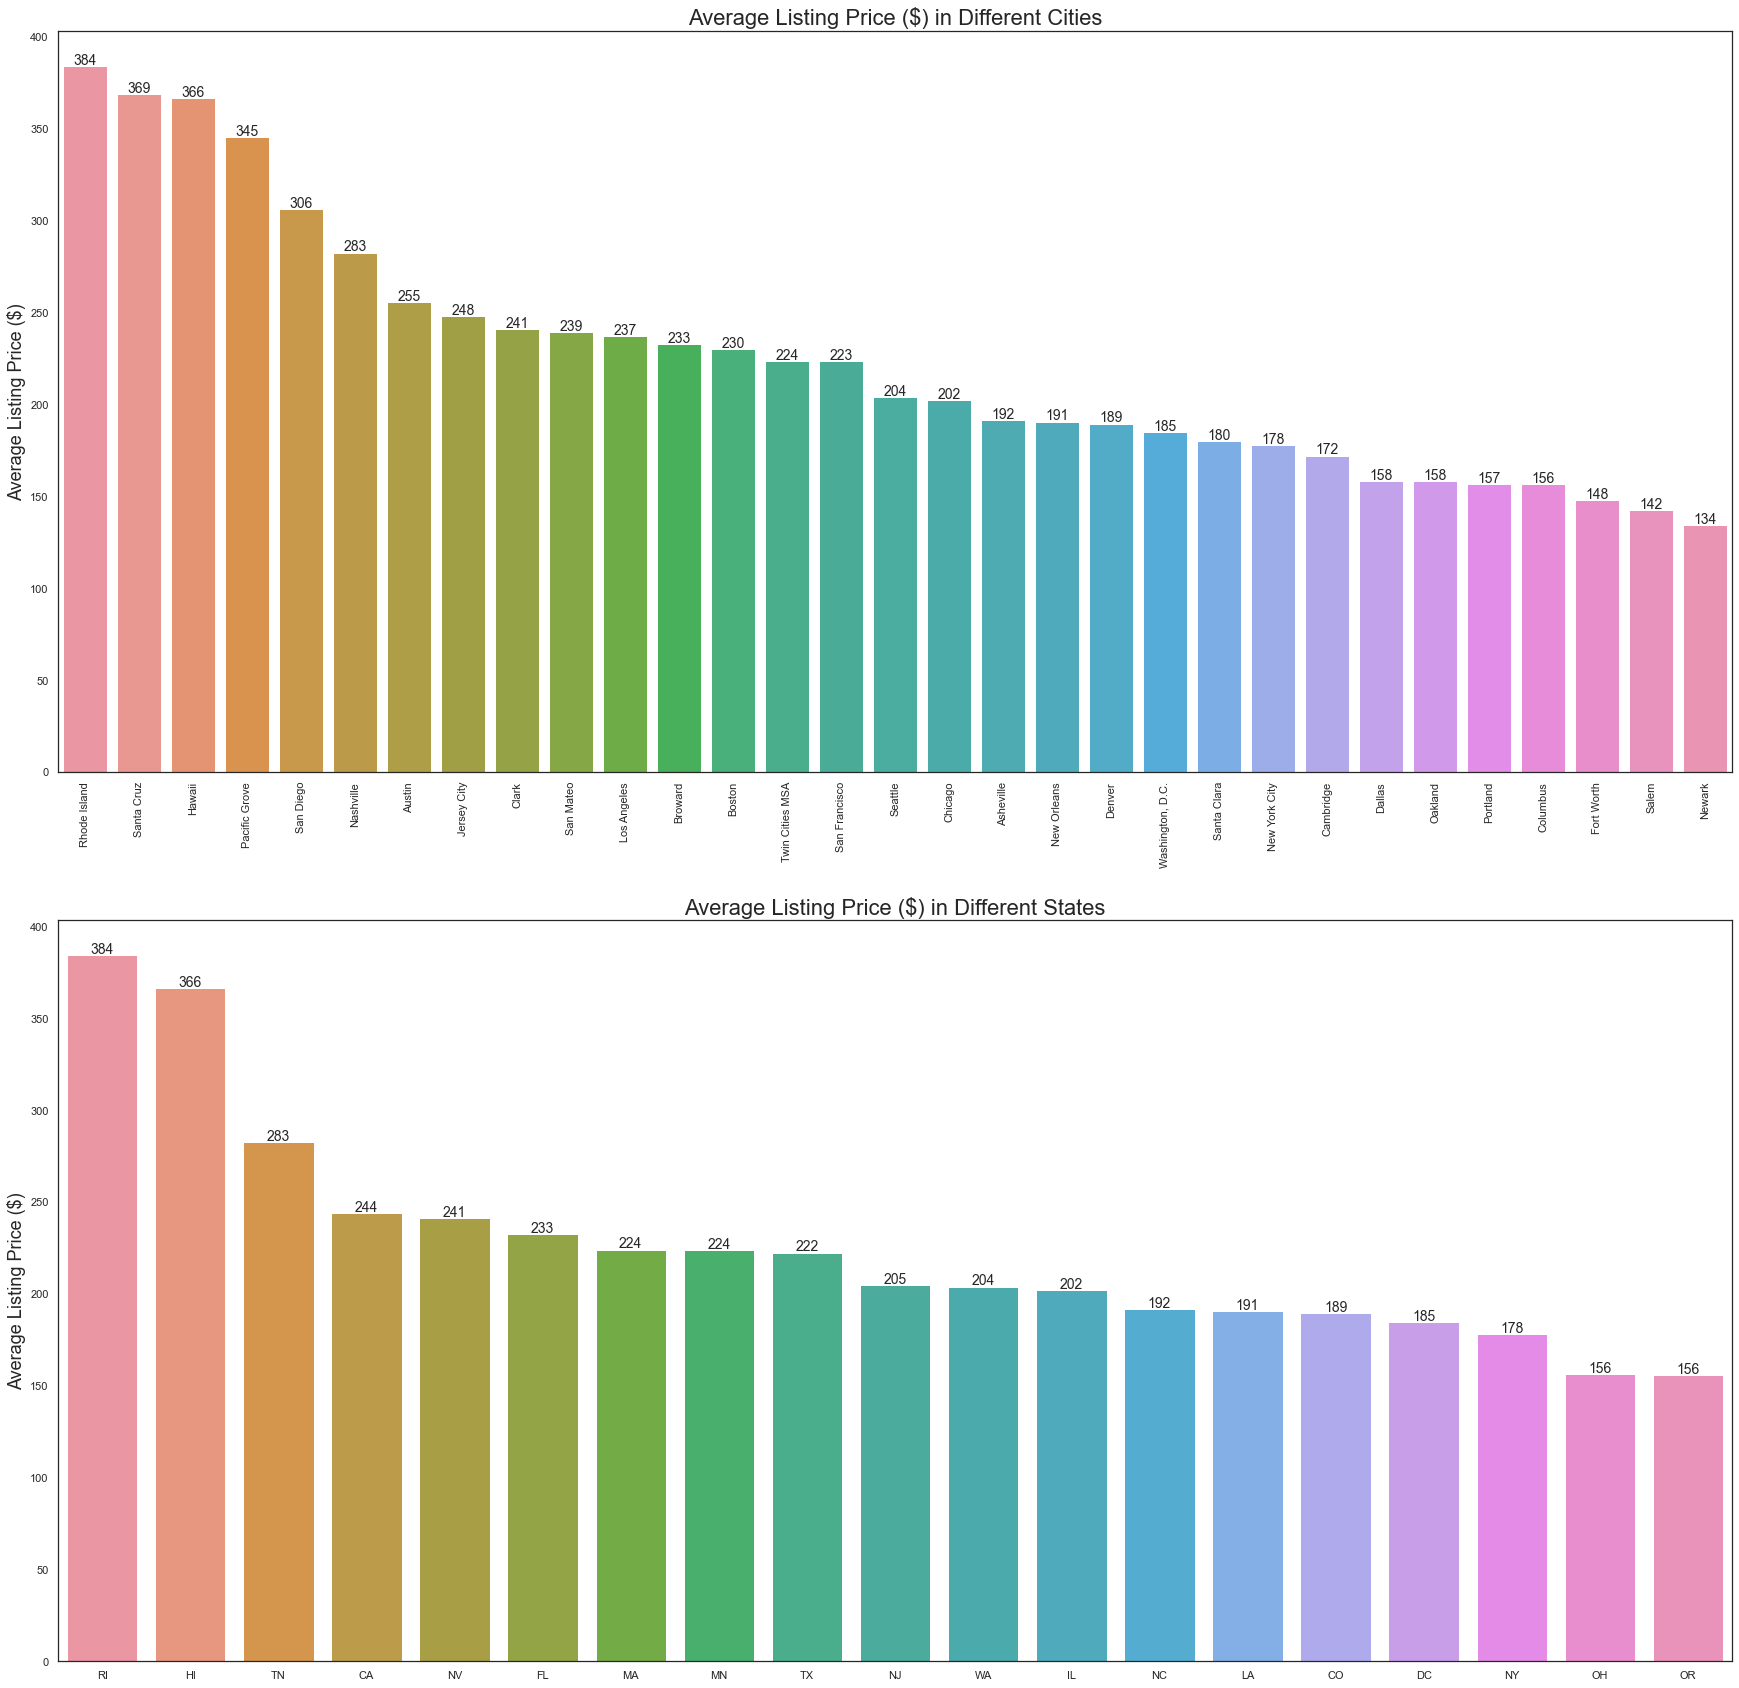

In [647]:
# check the difference in price by groups by states and cities
fig, ax = plt.subplots(nrows = 2, figsize = [30,30])

#draw bar plots
def GroupDiff(df, x_var, y_var,r):
    '''
    INPUT:
    df - dataframe used for visualization
    x_var - the target categorical variable for visualization
    y_var_name - the label for the target categorical variable
    i,j - subplot position
    
    OUTPUT: a bar chart as a subplot that visualize the group difference
    '''
    order = df.groupby([x_var]).mean().reset_index().sort_values(by = y_var, ascending = False)[x_var]
    chart = sns.barplot(data = df, x = x_var, y = y_var, ci = None, order = order, ax = ax[r])
    
    
    for p in chart.patches:
        height = p.get_height()
        chart.text(x = p.get_x()+(p.get_width()/2),
                y = height+1,
                s = '{:.0f}'.format(height),
                fontsize= 14,
                ha = 'center') 
    
GroupDiff(df_master, 'city','price',0)
GroupDiff(df_master, 'state','price',1)

#add subtitles
ax[0].set_title('Average Listing Price ($) in Different Cities',fontsize = 22)
ax[1].set_title('Average Listing Price ($) in Different States',fontsize = 22)

#add x axis labels
ax[0].set_xlabel('',fontsize = 18)
ax[1].set_xlabel('',fontsize = 18)

#add y axis labels
ax[0].set_ylabel('Average Listing Price ($)', fontsize = 18)
ax[1].set_ylabel('Average Listing Price ($)', fontsize = 18)

#rotate x axis ticks
xticklabels = list(df_master.groupby(['city']).mean().reset_index().sort_values(by = 'price', ascending = False)['city'])
ax[0].set_xticklabels(xticklabels, rotation = 90)


plt.show()

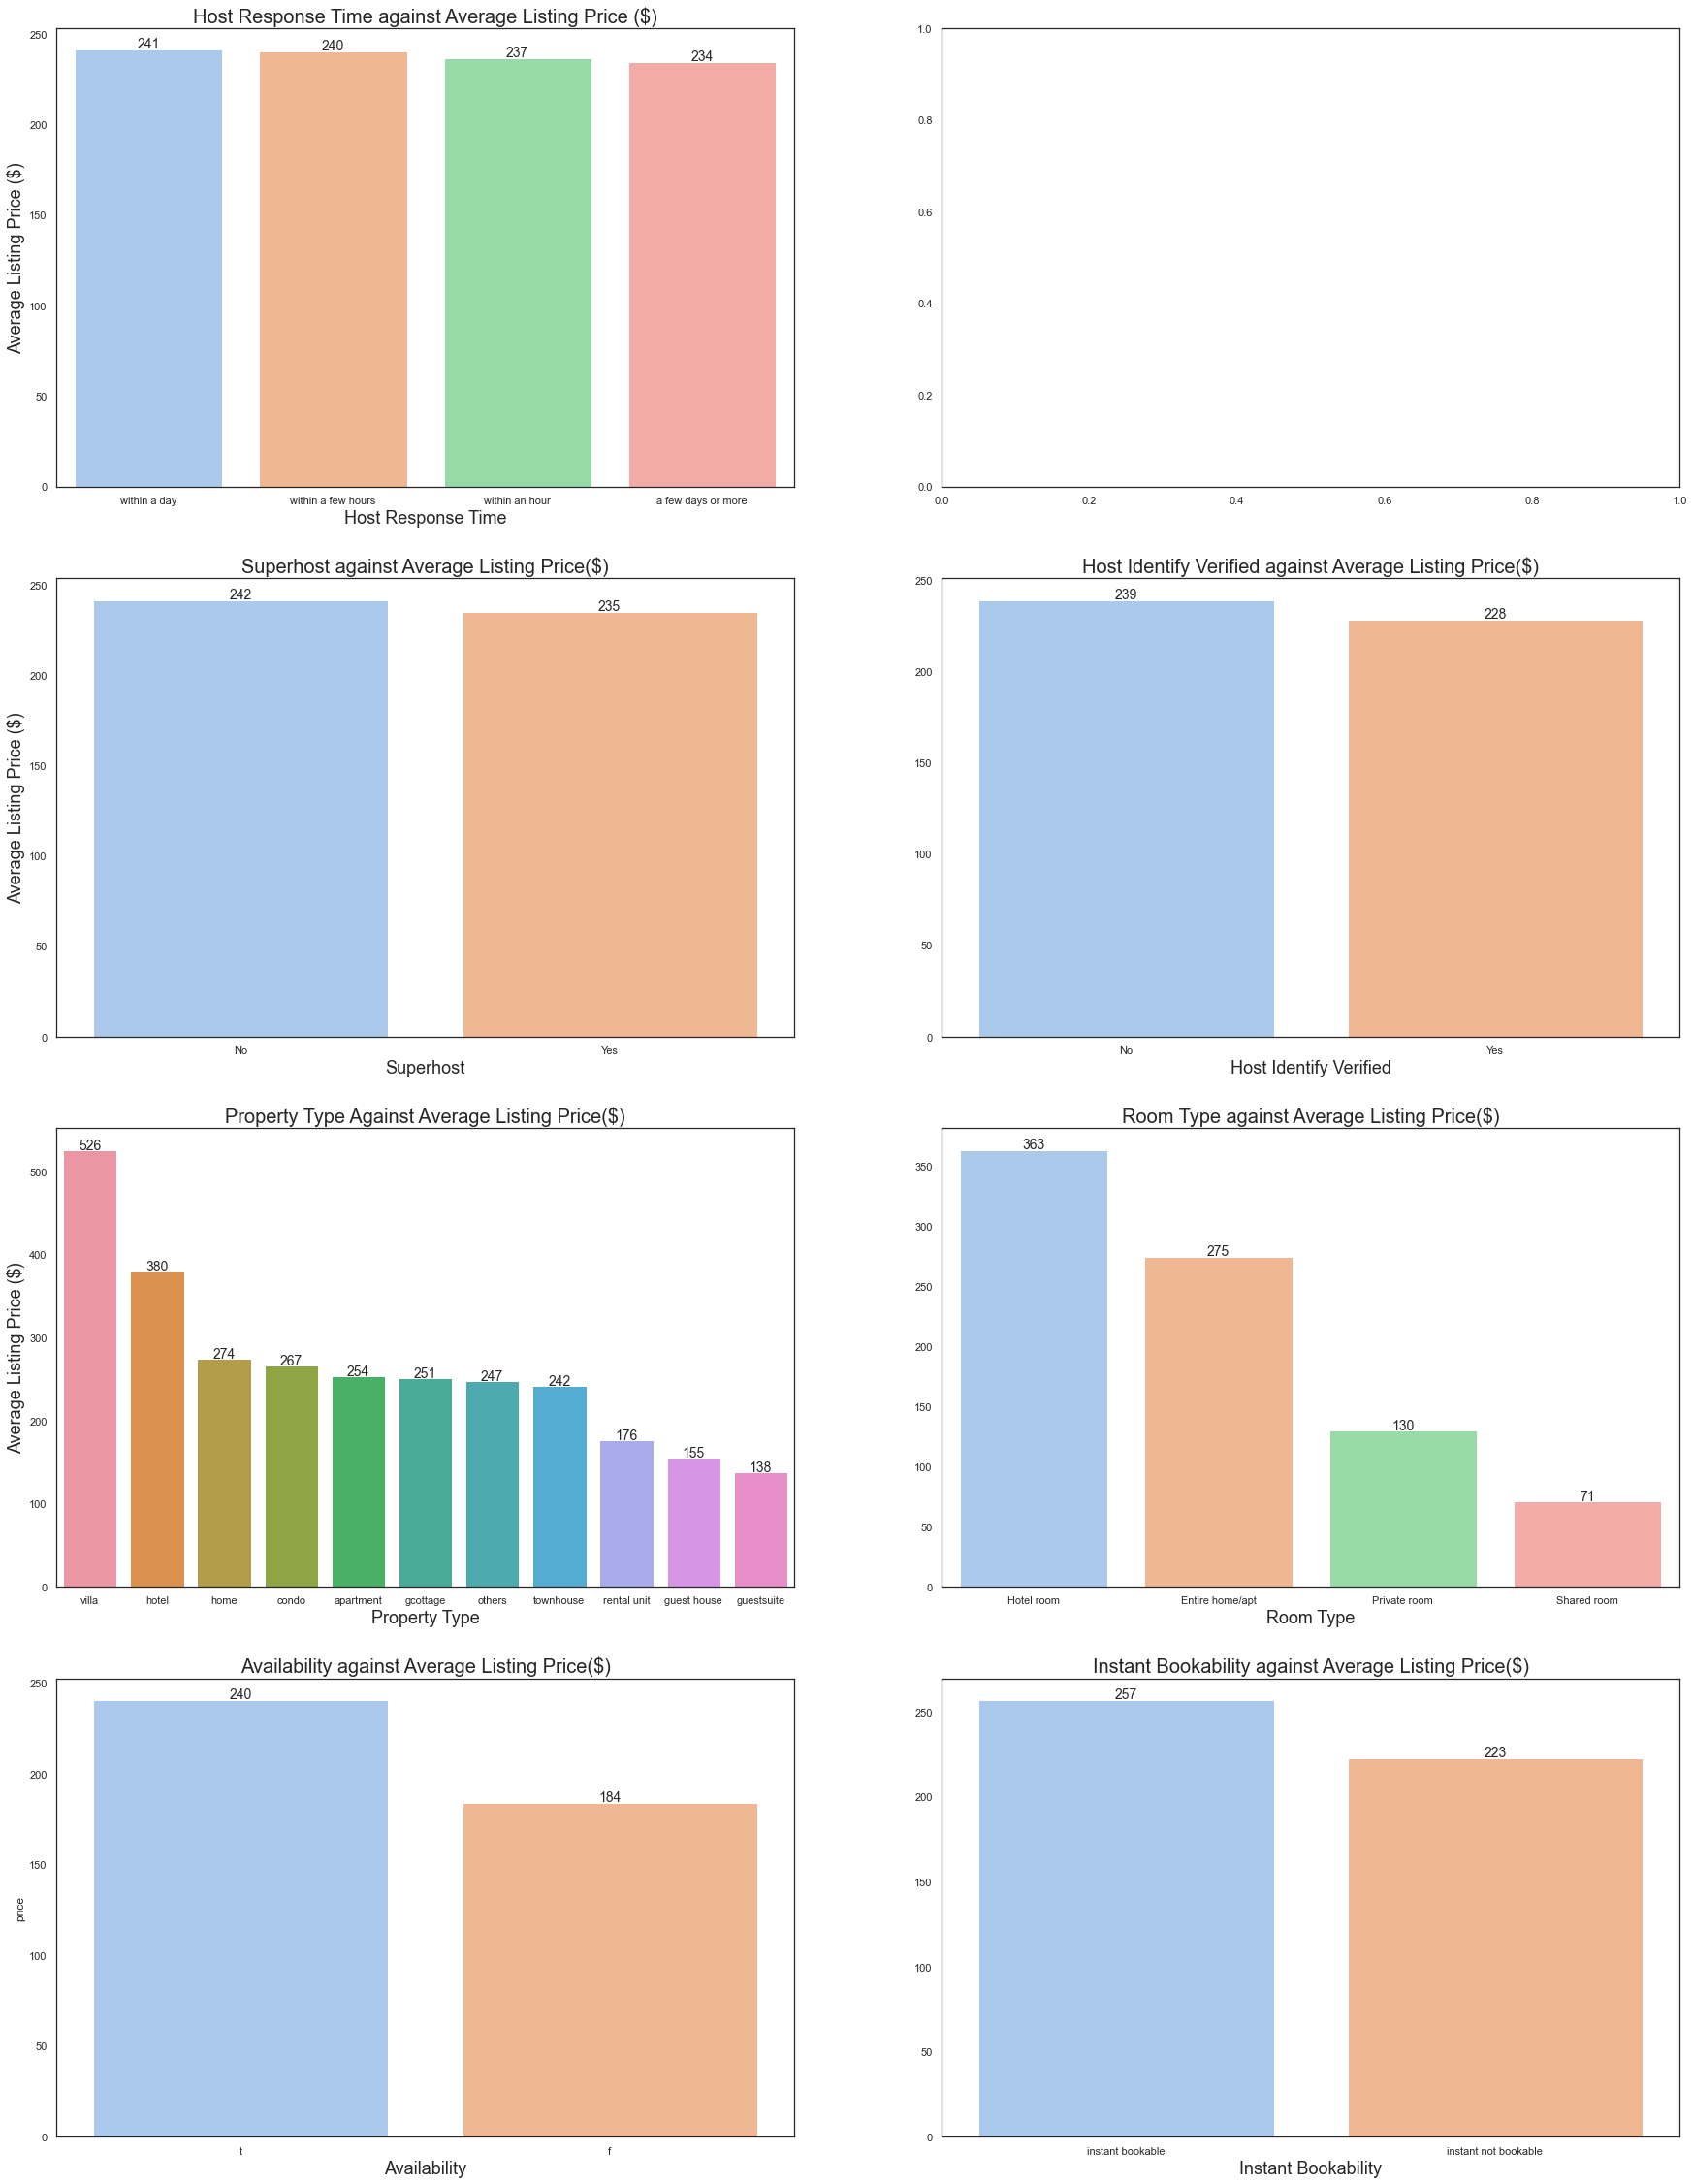

In [648]:
# check the difference in price by groups of categorical variables
fig, ax = plt.subplots(ncols = 2, nrows = 4, figsize = [30,40])

#draw bar plots
def GroupDiff(df, x_var, y_var,i, j):
    '''
    INPUT:
    df - dataframe used for visualization
    x_var - the target categorical variable for visualization
    y_var_name - the label for the target categorical variable
    i,j - subplot position
    
    OUTPUT: a bar chart as a subplot that visualize the group difference
    '''
    order = df.groupby([x_var]).mean().reset_index().sort_values(by = y_var, ascending = False)[x_var]
    chart = sns.barplot(data = df, x = x_var, y = y_var, ci = None, order = order, ax = ax[i,j])
    
    for p in chart.patches:
        height = p.get_height()
        chart.text(x = p.get_x()+(p.get_width()/2),
                y = height+1,
                s = '{:.0f}'.format(height),
                fontsize= 14,
                ha = 'center') 
    
GroupDiff(df_master, 'host_response_time','price',0,0)
GroupDiff(df_master, 'host_is_superhost','price',1,0)
GroupDiff(df_master, 'host_identity_verified','price',1,1)


GroupDiff(df_master, 'property_type_new','price',2,0)
GroupDiff(df_master, 'room_type','price',2,1)

GroupDiff(df_master, 'has_availability','price',3,0)
GroupDiff(df_master, 'instant_bookable','price',3,1)

#add subtitles
ax[0,0].set_title('Host Response Time against Average Listing Price ($)',fontsize = 20)
ax[1,0].set_title('Superhost against Average Listing Price($)',fontsize = 20)
ax[1,1].set_title('Host Identify Verified against Average Listing Price($)',fontsize = 20)
ax[2,0].set_title('Property Type Against Average Listing Price($)',fontsize = 20)
ax[2,1].set_title('Room Type against Average Listing Price($)',fontsize = 20)
ax[3,0].set_title('Availability against Average Listing Price($)',fontsize = 20)
ax[3,1].set_title('Instant Bookability against Average Listing Price($)',fontsize = 20)

#add x axis labels
ax[0,0].set_xlabel('Host Response Time',fontsize = 18)
ax[1,0].set_xlabel('Superhost',fontsize = 18)
ax[1,1].set_xlabel('Host Identify Verified',fontsize = 18)
ax[2,0].set_xlabel('Property Type',fontsize = 18)
ax[2,1].set_xlabel('Room Type', fontsize = 18)
ax[3,0].set_xlabel('Availability', fontsize = 18)
ax[3,1].set_xlabel('Instant Bookability', fontsize = 18)

#add y axis labels
ax[0,0].set_ylabel('Average Listing Price ($)', fontsize = 18)
ax[0,1].set_ylabel('')
ax[1,0].set_ylabel('Average Listing Price ($)', fontsize = 18)
ax[1,1].set_ylabel('')
ax[2,0].set_ylabel('Average Listing Price ($)', fontsize = 18)
ax[2,1].set_ylabel('')
ax[2,0].set_ylabel('Average Listing Price ($)', fontsize = 18)
ax[3,1].set_ylabel('')

plt.show()

In [710]:
# Anovas to check the significance of the difference
anova_ava = ols('price ~ C(has_availability)', data=df_master).fit()
print('availability \n',sm.stats.anova_lm(anova_ava , typ=2))

availability 
                            sum_sq        df           F         PR(>F)
C(has_availability)  3.995230e+07       1.0  745.838736  5.799538e-164
Residual             1.268578e+10  236821.0         NaN            NaN


In [711]:
anova_book = ols('price ~ C(instant_bookable)', data=df_master).fit()
print('instant bookability \n',sm.stats.anova_lm(anova_book , typ=2))

instant bookability 
                            sum_sq        df            F         PR(>F)
C(instant_bookable)  6.768311e+07       1.0  1266.291793  1.294947e-276
Residual             1.265805e+10  236821.0          NaN            NaN


In [712]:
anova_room = ols('price ~ C(room_type)', data=df_master).fit()
print('room type \n',sm.stats.anova_lm(anova_room, typ=2))

room type 
                     sum_sq        df            F  PR(>F)
C(room_type)  9.954768e+08       3.0  6699.139983     0.0
Residual      1.173025e+10  236819.0          NaN     NaN


In [713]:
anova_city = ols('price ~ C(city)', data=df_master).fit()
print('city \n',sm.stats.anova_lm(anova_city, typ=2))

city 
                 sum_sq        df           F  PR(>F)
C(city)   9.140241e+08      30.0  610.788441     0.0
Residual  1.181171e+10  236792.0         NaN     NaN


In [714]:
anova_res = ols('price ~ C(host_response_time)', data=df_master).fit()
print('response \n',sm.stats.anova_lm(anova_res, typ=2))

response 
                              sum_sq        df         F    PR(>F)
C(host_response_time)  5.764184e+05       3.0  3.575774  0.013297
Residual               1.272515e+10  236819.0       NaN       NaN


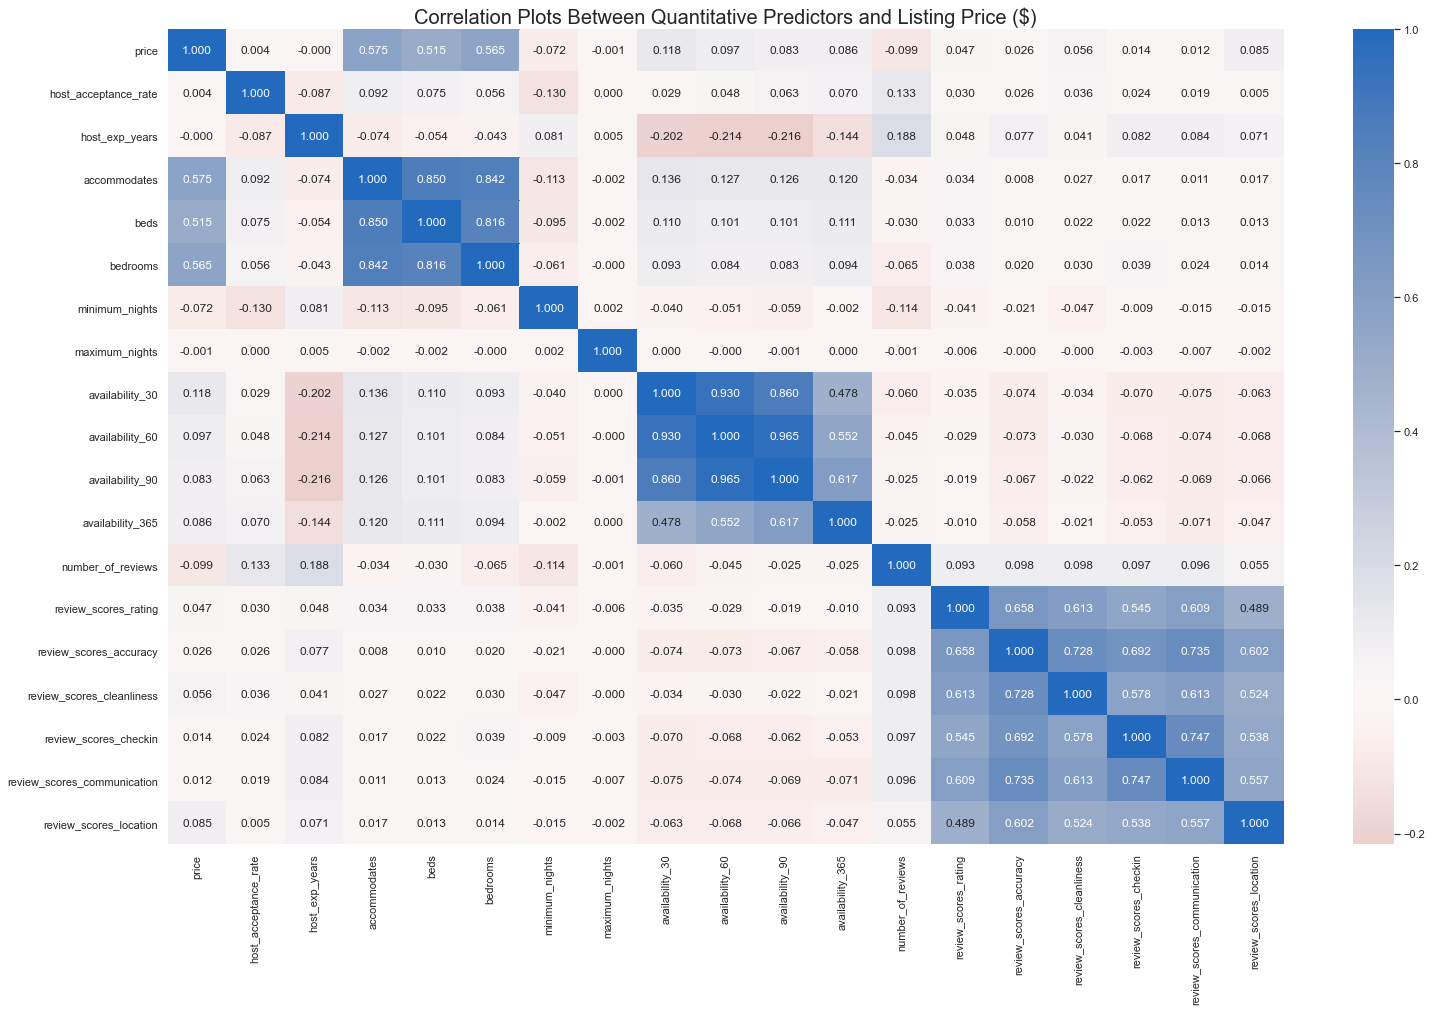

In [652]:
##draw the correlation plot matrix
plt.figure(figsize = [25, 15])
plt.title("Correlation Plots Between Quantitative Predictors and Listing Price ($)", fontsize = 20)
quant_vars = predictors_host_related_quan + predictors_room_related_quan
sns.heatmap(df_master[['price'] + quant_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)


plt.show()

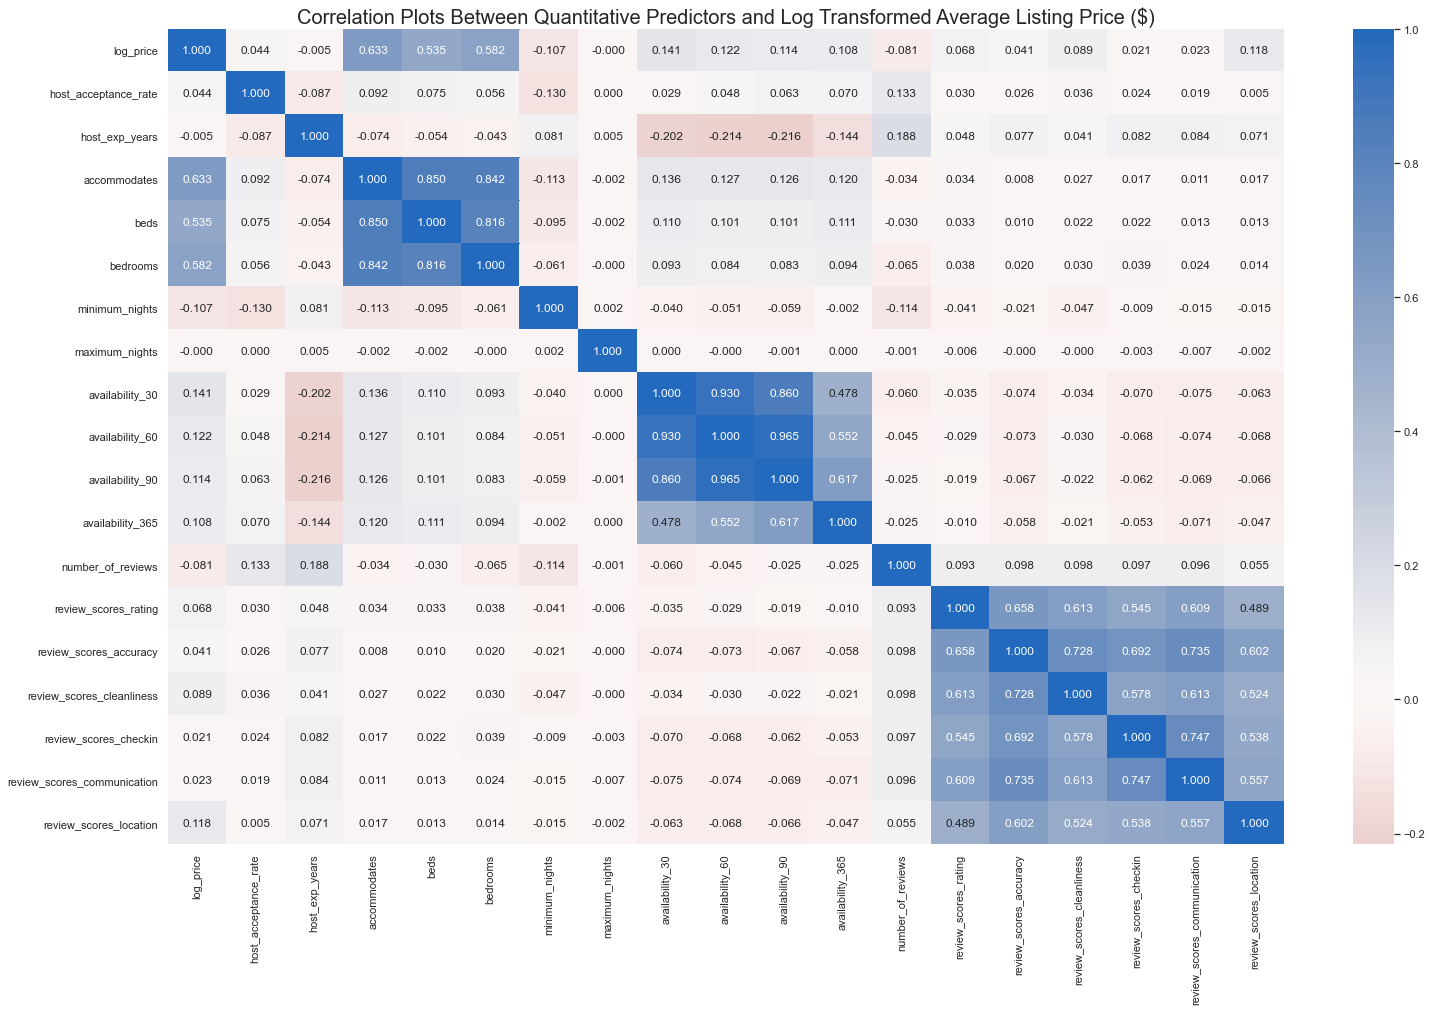

In [653]:
##draw the correlation plot matrix
plt.figure(figsize = [25, 15])
plt.title("Correlation Plots Between Quantitative Predictors and Log Transformed Average Listing Price ($)", fontsize = 20)
sns.heatmap(df_master[['log_price'] + quant_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)


plt.show()

----

### Conclusion from model free exploration
#### 1. all categorical and quantitative variables will be included despite some quantiative variables has weeak bivariate correlations with price.
#### 2. some quantitative variables tend to be highly correlated, creating potential multi-collinearity and overfitting issues, such as: 
     availability_30, availability_60, availability_90, availability_365;
     accommodates, beds, bedrooms;
     review_scores_rating, review_scores_accuracy, review_scores_cleanliness,
     review_scores_communication，review_scores_checkin,review_scores_location, review_scores_value;
#### 3. though state appears to be another siginificant categorical preditor, since city is nested under state and will be more accurate regional indicator, only city will be included. 
#### 4. both raw price and log transformed price will be treated as the focal outcome variable
#### 5. regularization will be used to address potential multicolinearity and overfitting issues. 

------

## Statistical Analysis and Modelling 

In [87]:
df_master.columns

Index(['id', 'host_id', 'calendar_last_scraped', 'neighbourhood', 'latitude',
       'longitude', 'price', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms',
       'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'reviews_per_month', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cl

In [879]:
#create the quantative variable list for modelling
quant_cols = ['host_acceptance_rate', 'host_exp_years',#host-related
              'accommodates', 'beds', 'bedrooms', #accomodation-related
              'minimum_nights', 'maximum_nights', #accomodation-related
              'availability_30', 'availability_60', 'availability_90', 'availability_365', #accomodation-related
              'number_of_reviews', #accomodation-related
              'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_communication',
              'review_scores_checkin', 'review_scores_location', 'review_scores_value'] #accomodation-related

In [718]:
#create the categorical variable list
cat_cols = ['host_response_time','host_is_superhost','host_identity_verified',#host-related
            'has_availability','property_type_new','room_type','instant_bookable', #accomodation-related
            'city'] #environment-related

In [880]:
#create dummies for categorical variables and drop the original variable
def CreateDummies(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [881]:
#create a full variable list
full_cols = basics + dv + quant_cols + cat_cols + ['state'] + ['log_price']

In [882]:
full_cols

['id',
 'host_id',
 'calendar_last_scraped',
 'neighbourhood',
 'latitude',
 'longitude',
 'price',
 'host_acceptance_rate',
 'host_exp_years',
 'accommodates',
 'beds',
 'bedrooms',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_communication',
 'review_scores_checkin',
 'review_scores_location',
 'review_scores_value',
 'host_response_time',
 'host_is_superhost',
 'host_identity_verified',
 'has_availability',
 'property_type_new',
 'room_type',
 'instant_bookable',
 'city',
 'state',
 'log_price']

In [883]:
df_master_final = CreateDummies(df_master[full_cols], cat_cols, False)

In [884]:
df_master_final.head()

,id,host_id,calendar_last_scraped,neighbourhood,latitude,longitude,price,host_acceptance_rate,host_exp_years,accommodates,...,city_Rhode Island,city_Salem,city_San Diego,city_San Francisco,city_San Mateo,city_Santa Clara,city_Santa Cruz,city_Seattle,city_Twin Cities MSA,"city_Washington, D.C."
0,108061,320564,2022-06-11,"Asheville, North Carolina, United States",35.60670,-82.55563,120.0,17.0,12.0,2,...,0,0,0,0,0,0,0,0,0,0
1,155305,746673,2022-06-11,"Asheville, North Carolina, United States",35.57864,-82.59578,100.0,98.0,11.0,2,...,0,0,0,0,0,0,0,0,0,0
2,156805,746673,2022-06-11,"Asheville, North Carolina, United States",35.57864,-82.59578,66.0,98.0,11.0,2,...,0,0,0,0,0,0,0,0,0,0
3,156926,746673,2022-06-11,NaN,35.57864,-82.59578,33.0,98.0,11.0,1,...,0,0,0,0,0,0,0,0,0,0
4,197263,961396,2022-06-11,NaN,35.57808,-82.63689,45.0,97.0,11.0,2,...,0,0,0,0,0,0,0,0,0,0


In [885]:
df_master_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236823 entries, 0 to 266080
Data columns (total 78 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   id                                     236823 non-null  int64         
 1   host_id                                236823 non-null  int64         
 2   calendar_last_scraped                  236823 non-null  datetime64[ns]
 3   neighbourhood                          148350 non-null  object        
 4   latitude                               236823 non-null  float64       
 5   longitude                              236823 non-null  float64       
 6   price                                  236823 non-null  float64       
 7   host_acceptance_rate                   236823 non-null  float64       
 8   host_exp_years                         236823 non-null  float64       
 9   accommodates                           236823 no

In [886]:
df_master_final.to_csv('df_master_final.csv',index = False)

In [887]:
#create the predictors marix
X = df_master_final.drop(['price','log_price','state'] + basics, axis = 1)
X.columns

Index(['host_acceptance_rate', 'host_exp_years', 'accommodates', 'beds',
       'bedrooms', 'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_checkin', 'review_scores_location',
       'review_scores_value', 'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour', 'host_is_superhost_Yes',
       'host_identity_verified_Yes', 'has_availability_t',
       'property_type_new_condo', 'property_type_new_gcottage',
       'property_type_new_guest house', 'property_type_new_guestsuite',
       'property_type_new_home', 'property_type_new_hotel',
       'property_type_new_others', 'property_type_new_rental unit',
       'property_type_new_townhouse', 'property_type_new_villa',
       'room_ty

In [888]:
#create the outcome variable marix
y = df_master_final[['price','log_price']]

In [889]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [890]:
#as argued above, regularization will be used to address potential multi-collinearity and overfitting issues. 
#since we do not have many features, ridge regression or Elastic Net regularization which combines both the lasso and ridge regression methods by learning from their shortcomings to improve the regularization of statistical models will be used as the regularization method.
#before fitting the model, it is critical to find the appororiate penality size (lambda) that balances the size of bias (underfitting issues) and variance (overfitting issues)

def FindBestPara(method, model, paras, y, y_name):
    '''
    INPUT:
    method - search method: either GridSearchCV or RandomizedSearchCV
    model - regualarization model: either ridge or elastic net
    paras - parameters need to be find the best (dictionary)
    y - outcome variable matrix used in the model
    y_name - the name of the outcome variable in the model
   
    OUTPUT:
    the best paramaters used for regualarization
    '''
    m = model(normalize = True) #keep other parameters as default
    parameters = paras
    clf = method(m, parameters) #keep other parameters as default
    search = clf.fit(X_train, y)

    print ('best parameters for ', str(model), ' and ', y_name, ' is ', search.best_params_)

In [891]:
#Ridge Regression, price
alpha_array = np.arange(0,10, step = 0.1)
paras = dict(alpha = alpha_array)
y = y_train['price']

FindBestPara(GridSearchCV, Ridge, paras, y, 'average listing price') #use GridSearch for ridge regression as only one parameter needs to be searched

best parameters for  <class 'sklearn.linear_model._ridge.Ridge'>  and  average listing price  is  {'alpha': 0.0}


In [892]:
#Ridge Regression, log_price
alpha_array = np.arange(0,10, step = 0.1)
paras = dict(alpha = alpha_array)
y = y_train['log_price']

FindBestPara(GridSearchCV, Ridge, paras, y, 'average listing price (log transformed)')

best parameters for  <class 'sklearn.linear_model._ridge.Ridge'>  and  average listing price (log transformed)  is  {'alpha': 0.0}


In [893]:
#Elastic Net Regression Regression, price
alpha_array = np.arange(0,10, step = 0.1)
ratio_array = np.arange(0,1, step = 0.1)
paras = dict(alpha = alpha_array, l1_ratio = ratio_array) 
y = y_train['price']
 
FindBestPara(RandomizedSearchCV, ElasticNet, paras, y, 'average listing price') #use RandomizedSearchCV for elastic net regerssion to save time and reduce computation complexity as two paramters need to be searched

best parameters for  <class 'sklearn.linear_model._coordinate_descent.ElasticNet'>  and  average listing price  is  {'l1_ratio': 0.2, 'alpha': 0.1}


In [894]:
#Elastic Net Regression Regression, log_price
alpha_array = np.arange(0,10, step = 0.1)
ratio_array = np.arange(0,1, step = 0.05)
paras = dict(alpha = alpha_array, l1_ratio = ratio_array) 

y = y_train['log_price']
FindBestPara(RandomizedSearchCV, ElasticNet, paras, y, 'average listing price (log transformed)')

best parameters for  <class 'sklearn.linear_model._coordinate_descent.ElasticNet'>  and  average listing price (log transformed)  is  {'l1_ratio': 0.9500000000000001, 'alpha': 8.5}


In [895]:
#Ridge and ElasticNet regression provide inconsistent results on how large the regularization penelty should be used, and the l1_ratio in ElasticNet regression suggest a balanced approach
#to further investigate this issue, draw a graph on change in R-squared based on different values of penelty (0-10, step = 0.01) and only use both the average listing price and log transformed
#in this valution, set l1_ratio to be 0.5 as the CV searh suggests

def EvaluationR2(model, lambdas, X_train, X_test, y_train, y_test):
    
    '''
    INPUT: 
    model - regularization model
    lambdas - penality size
    X_train, X_test, y_train, y_test - training and testing datasets
    title - figure titile (e.g., model name on the outcome variable)
    
    OUTPUT: evaluation graph with lambdas as x and r-squared as y
    '''
    
    r2_train = []
    r2_test = []
    
    for l in lambdas:
        m = model(alpha = l).fit(X_train, y_train)
        
        y_train_preds = m.predict(X_train)
        y_test_preds = m.predict(X_test)
        
        
        train_score= r2_score(y_train, y_train_preds)
        test_score= r2_score(y_test, y_test_preds)
        
        
        r2_train.append(train_score)
        r2_test.append(test_score)
    
    
    r2_min = np.min(r2_train + r2_test)
    r2_max = np.max(r2_train + r2_test)
        
    return r2_train, r2_test, r2_min, r2_max

In [896]:
lambdas = np.arange(0,10, step = 0.1)

In [897]:
r2_ridge_price = EvaluationR2(Ridge, lambdas, X_train, X_test, y_train['price'], y_test['price'])

In [898]:
r2_ridge_log_price = EvaluationR2(Ridge, lambdas, X_train, X_test, y_train['log_price'], y_test['log_price'])

In [899]:
r2_elasticnet_price = EvaluationR2(ElasticNet, lambdas, X_train, X_test, y_train['price'], y_test['price'])

In [900]:
r2_elasticnet_log_price = EvaluationR2(Ridge, lambdas, X_train, X_test, y_train['log_price'], y_test['log_price'])

In [901]:
#check range of r2
print('r2 range for ridge price: ', ["{:.3f}".format(r2_ridge_price[2]), "{:.3f}".format(r2_ridge_price[3])])
print('r2 range for ridge log price: ', ["{:.3f}".format(r2_ridge_log_price[2]), "{:.3f}".format(r2_ridge_log_price[3])])
print('r2 range for elastic net price: ', ["{:.3f}".format(r2_elasticnet_price[2]), "{:.3f}".format(r2_elasticnet_price[3])])
print('r2 range for elastic net log price: ', ["{:.3f}".format(r2_elasticnet_log_price[2]), "{:.3f}".format(r2_elasticnet_log_price[3])])

r2 range for ridge price:  ['0.455', '0.458']
r2 range for ridge log price:  ['0.606', '0.609']
r2 range for elastic net price:  ['0.324', '0.458']
r2 range for elastic net log price:  ['0.606', '0.609']


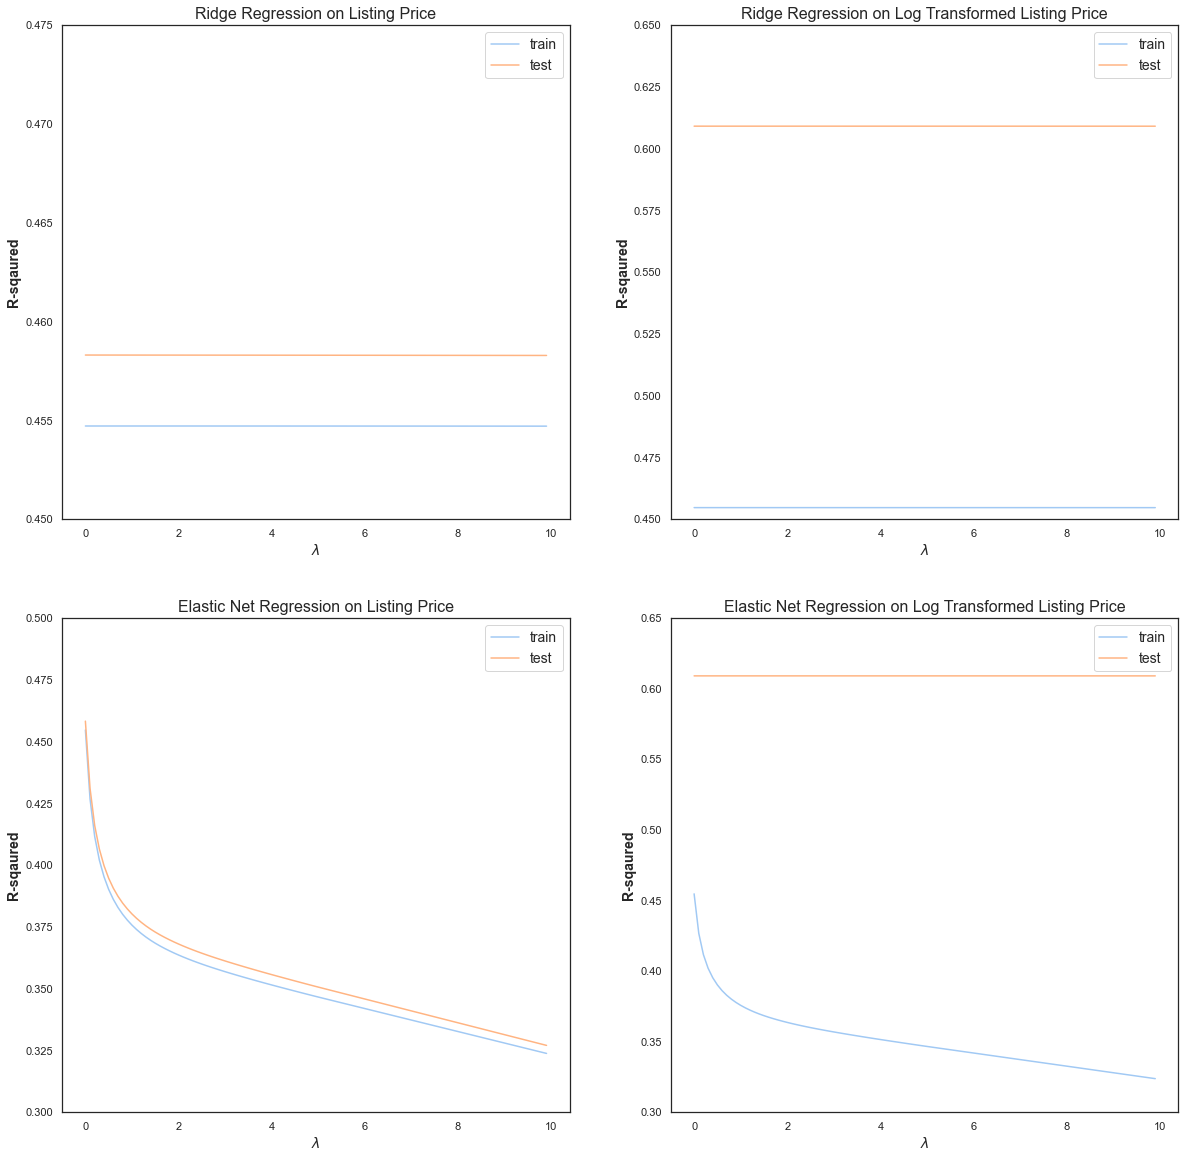

In [902]:
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = [20,20])

def EvaluationGraph(r2_train, r2_test, r2_low, r2_high, title, i, j):
    '''
    INPUT: 
    r2_train, r2_test - r2 scores for fitting training and testing datasets
    r2_low, r2_high - lower and upper bounds for the y axis range
    title - subplot title
    i, j - position of the subplot
    
    OUTPUT: a evaluation graph as as subplot
    '''
    
    ax[i,j].plot(lambdas, r2_train, label = "train",)
    ax[i,j].plot(lambdas, r2_test, label = "test")
    
    ax[i,j].set_ylim([r2_low, r2_high])
    ax[i,j].legend(fontsize=14)
    
    ax[i,j].set_title(title, fontsize = 16)
    ax[i,j].set_xlabel("$\\lambda$", fontsize = 14, fontweight = 'bold')
    ax[i,j].set_ylabel("R-sqaured", fontsize = 14, fontweight = 'bold')

    
EvaluationGraph(r2_ridge_price[0], r2_ridge_price[1], 0.450, 0.475, 'Ridge Regression on Listing Price', 0, 0)
EvaluationGraph(r2_ridge_price[0], r2_ridge_log_price[1], 0.450, 0.650, 'Ridge Regression on Log Transformed Listing Price', 0, 1)
EvaluationGraph(r2_elasticnet_price[0], r2_elasticnet_price[1], 0.300, 0.500, 'Elastic Net Regression on Listing Price', 1, 0)
EvaluationGraph(r2_elasticnet_price[0], r2_elasticnet_log_price[1], 0.300, 0.650, 'Elastic Net Regression on Log Transformed Listing Price', 1, 1)

plt.savefig('CV_reg.png')
plt.show()

In [903]:
#based on the results, the r-squared decreases as lambda increases, suggesting that regularization is not needed to fit the model (all suggest 0 penalty), instead linear regresssion should be used
#in addition, there is no evidence for overfitting, yet it could be subject to underfitting as R-squared is only moderate - 0.5 to 0.65
#since log-price yields a better model fit, as it addresses the skewness issues, it will be used as the focal outcome variable


pd.set_option('display.max_rows', 70)

def GetBs(X_train, X_test, y_train, y_test):
    '''
    INPUT: 
    X_train, X_test, y_train, y_test - training and testing datasets

    OUTPUT: unstandardized bs table
    '''
    
    coefs_df = pd.DataFrame()

    lm_model = LinearRegression().fit(X_train, y_train)
    lm_model_norm = LinearRegression (normalize = True).fit(X_train, y_train)
    
    coefs_df['Features/Predictors'] = X_train.columns
    
    coefs_df['Coefficient'] = np.round(lm_model.coef_,3)
    coefs_df['Coefficient (with normalized data)'] = np.round(lm_model_norm.coef_,3)
    
    coefs_df['Abs_coefficient'] = np.round(np.abs(lm_model.coef_),3)
    coefs_df['Abs_coefficient (with normalized data)'] = np.round(np.abs(lm_model_norm.coef_),3)
    
    coefs_df = coefs_df.sort_values('Abs_coefficient (with normalized data)', ascending=False)
    
    y_test_preds = lm_model.predict(X_test)
    
    print('r2_score for testing data is', r2_score(y_test, y_test_preds))
    print('r2_score for training data is', lm_model.score(X_train, y_train))


    return coefs_df 

In [915]:
GetBs(X_train, X_test, y_train['log_price'], y_test['log_price'])

r2_score for testing data is 0.6090976633555276
r2_score for training data is 0.6059567070732619


,Features/Predictors,Coefficient,Coefficient (with normalized data),Abs_coefficient,Abs_coefficient (with normalized data)
37,room_type_Shared room,-0.444,-0.444,0.444,0.444
30,property_type_new_hotel,0.294,0.294,0.294,0.294
65,city_Santa Cruz,0.255,0.255,0.255,0.255
57,city_Pacific Grove,0.239,0.239,0.239,0.239
36,room_type_Private room,-0.236,-0.236,0.236,0.236
59,city_Rhode Island,0.227,0.227,0.227,0.227
49,city_Hawaii,0.226,0.226,0.226,0.226
40,city_Boston,0.183,0.183,0.183,0.183
62,city_San Francisco,0.172,0.172,0.172,0.172
42,city_Cambridge,0.160,0.160,0.160,0.160


In [905]:
#get standardized beta

def GetBetas(X_train, X_test, y_train, y_test):
    '''
    INPUT: 
    X_train, X_test, y_train, y_test - training and testing datasets

    OUTPUT: std betas table'''
    
    std_coefs_df = pd.DataFrame()
    
    #standardize all data
    sc_x_train = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = sc_x_train.transform( X_train)
    
    sc_x_test = preprocessing.StandardScaler().fit(X_test)
    X_test_scaled = sc_x_test.transform(X_test)
    
    y_train_reshaped = y_train.values.reshape(-1,1)
    sc_y_train = preprocessing.StandardScaler().fit(y_train_reshaped)
    y_train_scaled = sc_y_train.transform(y_train_reshaped)
    
    y_test_reshaped = y_test.values.reshape(-1,1)
    sc_y_test = preprocessing.StandardScaler().fit(y_test_reshaped)
    y_test_scaled = sc_y_test.transform(y_test_reshaped)

    #fit the model
    lm_model_std = LinearRegression(normalize = True).fit(X_train_scaled, y_train_scaled)
    
    std_coefs_df['Features/Predictors'] = X_train.columns
    std_coefs_df['Std_coefficient'] = lm_model_std.coef_[0]
    
    std_coefs_df['Abs_std_coefficient'] = np.abs(lm_model_std.coef_[0])
    
    std_coefs_df = std_coefs_df.sort_values('Abs_std_coefficient', ascending=False)
    print('r2_score for training data is', lm_model_std.score(X_train_scaled, y_train_scaled))
    return std_coefs_df

In [906]:
GetBetas(X_train, X_test, y_train['log_price'], y_test['log_price'])

r2_score for training data is 0.6059567070732617


,Features/Predictors,Std_coefficient,Abs_std_coefficient
2,accommodates,0.311177,0.311177
36,room_type_Private room,-0.296716,0.296716
4,bedrooms,0.252450,0.252450
49,city_Hawaii,0.198558,0.198558
54,city_New York City,0.133792,0.133792
37,room_type_Shared room,-0.133371,0.133371
30,property_type_new_hotel,0.130715,0.130715
32,property_type_new_rental unit,-0.118919,0.118919
29,property_type_new_home,-0.115393,0.115393
17,review_scores_location,0.114851,0.114851


----------

### Key take-aways from statistical analysis:

####  1. from the environment's perspective, there is substaintial difference in price across cities and it suggests that airbnb accomodations in seaside cities that tourism plays a critical role are significantly more expensive than other urban cities.
####  2. from the host's perspective, host experience or tennure the strongest predictor of price, though it is still weak compared to other predictors. It is followed by whether the host is a super host; interestingly, their response time plays little role in prediciting price, possibly due to the low variance (most are prompt hosts); their badges (superhost, veriefifed identity) are positive predictors on price but they are weak
####  3. from the accomodation's perspective, the capacity of the accomodation (e.g., the number of bedrooms/beds and the number of guests) has strong positive effects on price; property type and room type are also critical categorical predictors; review also matters a lot as expected! In addition, availability in 30 days and minimum night requirement have positive and negative impacts on price respsectively.

## Supplementaries for the Blog Post

### Outlines for the post:
#### 1. Introduce airbnb and elaborate the importance of understanding factors that predict price
#### 2. Introduce the dataset and outline the sub-questions
#### 3. Answer the first sub question with virsualization - how does the environment affect price, and highlight the difference across cities and compare it with the grand mean
#### 4. Answer the second sub question with virsualization - how does host's characteristics affect price, and highlight the suprising litte influence on tenure and the role of having badge
#### 5. Answer the third sub question with virsualization-  how does accomodation's characteristics affect price and highlight the difference across room types and property types as well as the impacts of capacity and ratings on price
#### 6. A brief mentions of other factors without virsualization
#### 7. Conclude with takeaways

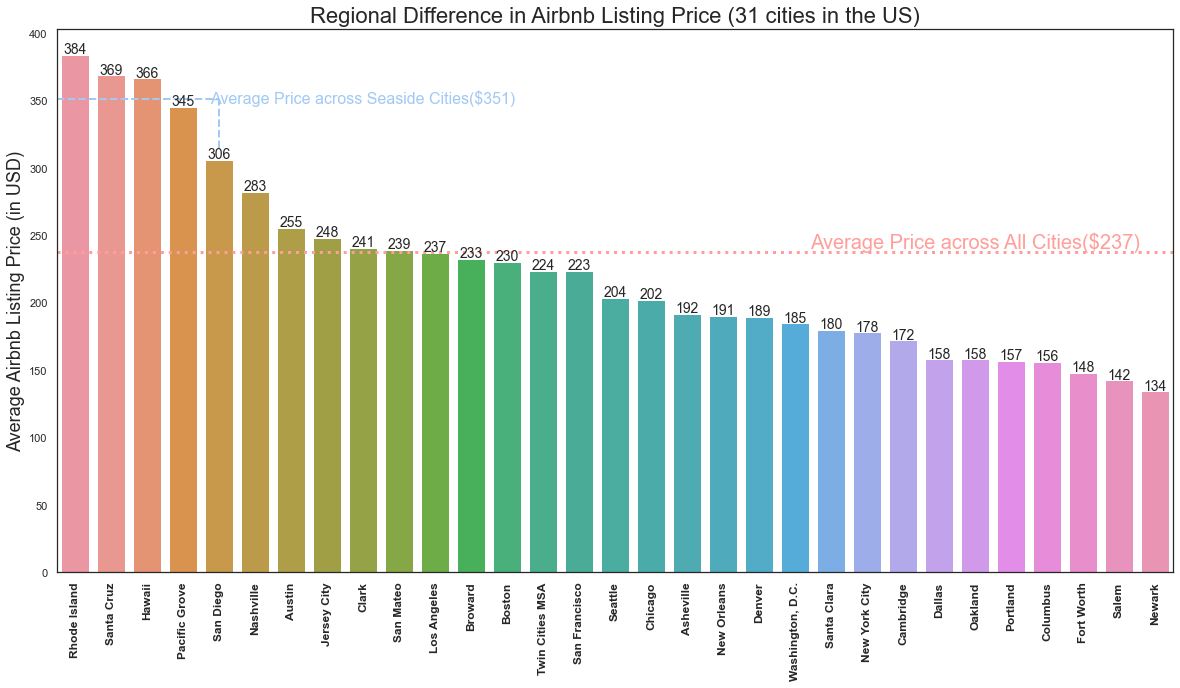

In [774]:
#virsualization for the city difference
plt.figure(figsize = [20,10])


seaside_cities = ['Rhode Island','Hawaii','San Diego','Santa Cruz','Pacific Grove']
seaside_cities_mean = df_master[df_master.city.apply(lambda x: x in seaside_cities)].price.mean() #get seaside cities mean
grand_mean = df_master.price.mean() #get grand mean


plt.axhline(y = grand_mean, color='r', linestyle='dotted', linewidth = 3)
plt.axhline(y = seaside_cities_mean, xmax = 0.145, color='b', linestyle='dashed', linewidth = 2)
plt.axvline(x = 4, ymin = 0.78, ymax = 0.87, color='b', linestyle='dashed', linewidth = 2)


plt.text(25, 240, 'Average Price across All Cities($237)', fontsize = 20, ha = 'center', color = 'r')
plt.text(8, 348, 'Average Price across Seaside Cities($351)', fontsize = 16, ha = 'center', color = 'b')

plt.title('Regional Difference in Airbnb Listing Price (31 cities in the US)', fontsize = 22)



order = df_master.groupby(['city']).mean().reset_index().sort_values(by = 'price', ascending = False)['city']
chart = sns.barplot(data = df_master, x = 'city', y = 'price', order = order, ci = None)
plt.xticks(rotation = 90, fontsize = 12, fontweight = 'bold')

for p in chart.patches:
    height = p.get_height()
    chart.text(x = p.get_x()+(p.get_width()/2),
               y = height+1,
               s = '{:.0f}'.format(height),
               fontsize= 14,
               ha = 'center') 
    
plt.ylabel('Average Airbnb Listing Price (in USD)', fontsize = 18)
plt.xlabel('')


plt.savefig('city_dif.png')
plt.show()

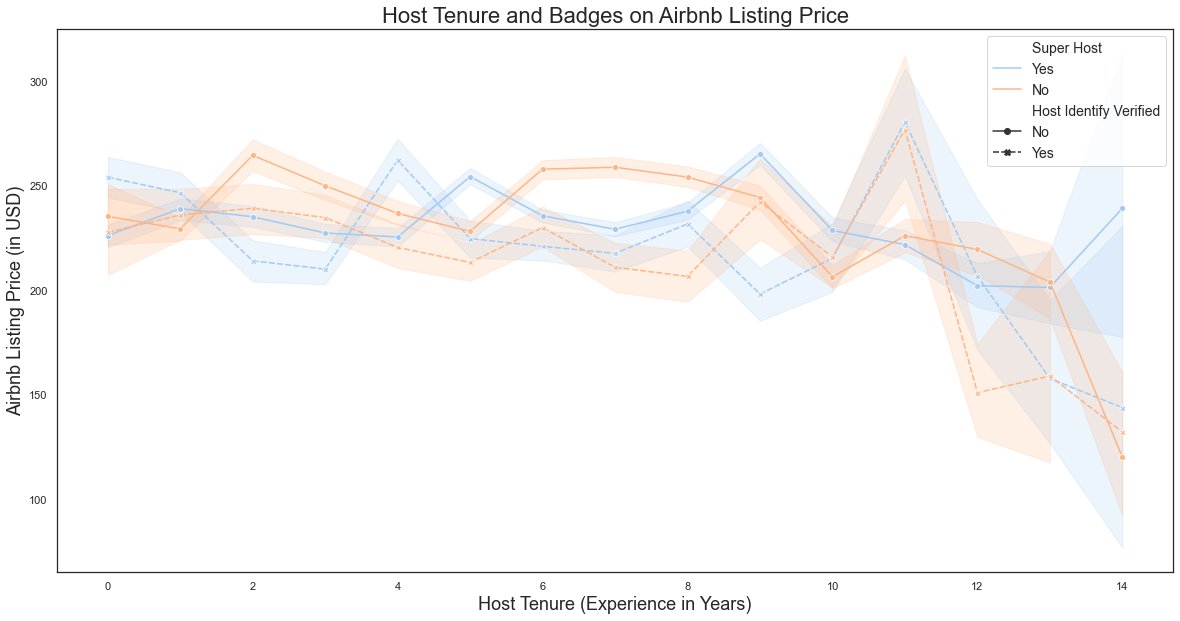

In [773]:
#virsualization for host related factors

df_host = df_master[['price', 'host_is_superhost', 'host_identity_verified', 'host_exp_years','host_exp_months']]
df_host.rename(columns = {'host_is_superhost': 'Super Host', 'host_identity_verified': 'Host Identify Verified'}, inplace = True)

host_exp_coded = []
for i in df_host.host_exp_years:
    if i <= 5:
        host_exp_coded.append('5 years and less')
    elif i > 10:
        host_exp_coded.append('more than 10 years')
    else:
        host_exp_coded.append('5 to 10 years')
        
df_host['host_exp_coded'] = host_exp_coded

plt.figure(figsize = [20,10])
sns.lineplot(data = df_host, x = 'host_exp_years', y = 'price', hue = 'Super Host', style = 'Host Identify Verified', markers=True)

plt.title('Host Tenure and Badges on Airbnb Listing Price', fontsize = 22)

plt.xlabel('Host Tenure (Experience in Years)',fontsize = 18)
plt.ylabel('Airbnb Listing Price (in USD)',fontsize = 18)
plt.legend(fontsize = 14)

plt.savefig('host_dif.png')
plt.show()

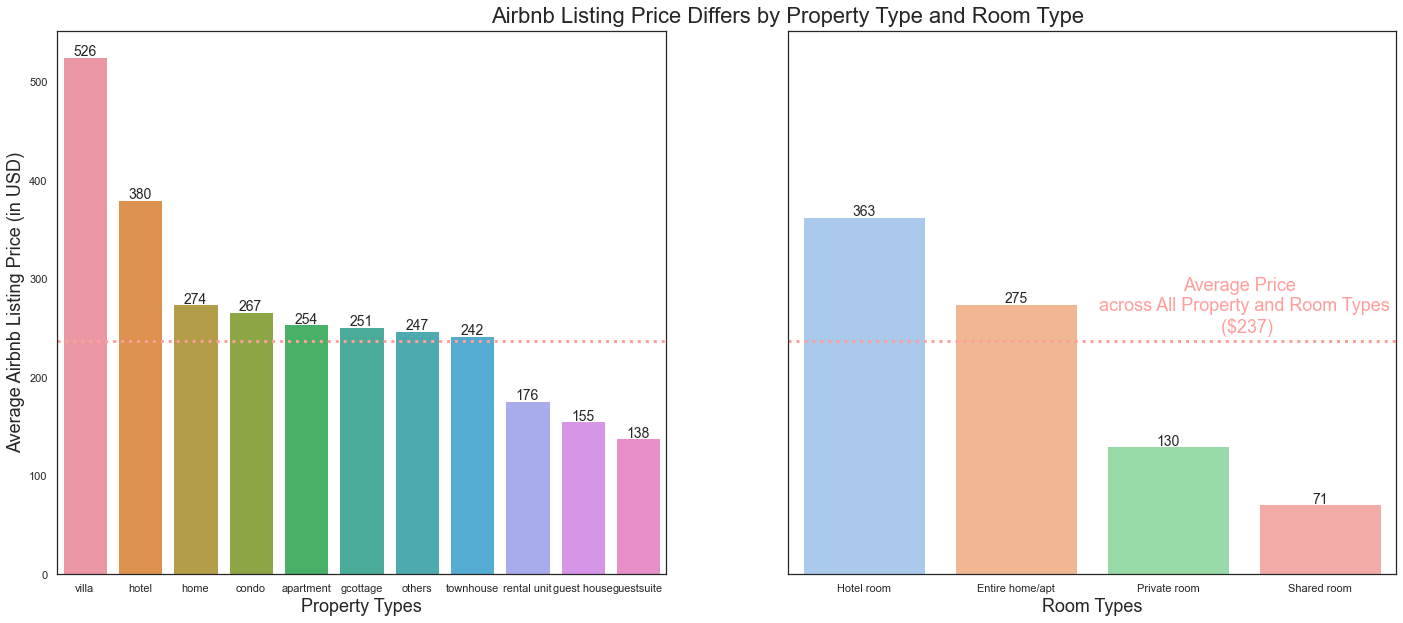

In [812]:
#virsualization for the property type and room type difference
fig, ax = plt.subplots(ncols = 2, figsize = [24,10], sharey=True)


#draw bar plots
def GroupDiff2(df, x_var, y_var,r, ascending,sort_by):
    '''
    INPUT:
    df - dataframe used for visualization
    x_var - the target categorical variable for visualization
    y_var_name - the label for the target categorical variable
    r - subplot position
    sort_by - rules for sort the values
    ascending - order rule for x
    
    OUTPUT: a bar chart as a subplot that visualize the group difference
    '''
    
  
    ax[r].axhline(y = df[y_var].mean(), color='r', linestyle='dotted', linewidth = 3)
    order = df_master.groupby([x_var]).mean().reset_index().sort_values(by = sort_by, ascending = ascending)[x_var]
    chart = sns.barplot(data = df, x = x_var, y = y_var, order = order, ci = None, ax = ax[r])
    
    
    for p in chart.patches:
        height = p.get_height()
        chart.text(x = p.get_x()+(p.get_width()/2),
                y = height+1,
                s = '{:.0f}'.format(height),
                fontsize= 14,
                ha = 'center') 
    
GroupDiff2(df_master, 'property_type_new','price',0, False, 'price')
GroupDiff2(df_master, 'room_type','price',1, False, 'price')


#add x axis labels
ax[0].set_xlabel('Property Types',fontsize = 18)
ax[1].set_xlabel('Room Types',fontsize = 18)

#add y axis labels
ax[0].set_ylabel('Average Airbnb Listing Price (in USD)', fontsize = 18)
ax[1].set_ylabel('')


plt.text(2.5,245, 'Average Price  \n across All Property and Room Types \n ($237)', fontsize = 18, ha = 'center', color = 'r')
plt.text(-0.5,560,'Airbnb Listing Price Differs by Property Type and Room Type', fontsize = 22 , ha = 'center')

plt.savefig('room_property_dif.png')
plt.show()

In [802]:
#check the reason why some property type has price premium - due to larger capacity
df_master.groupby('property_type_new').mean().reset_index()[['property_type_new','beds','bedrooms','accommodates']]

,property_type_new,beds,bedrooms,accommodates
0,apartment,1.956430,1.480402,4.058633
1,condo,2.384006,1.603209,4.492864
2,gcottage,2.522975,1.792042,4.345808
3,guest house,1.721346,1.239466,3.098838
4,guestsuite,1.681631,1.242681,3.061483
5,home,3.169989,2.379906,5.462270
6,hotel,2.092302,1.361368,4.174804
7,others,2.237210,1.511022,3.988732
8,rental unit,1.826849,1.415642,3.433371
9,townhouse,2.967130,2.178639,5.142626


In [813]:
df_master.accommodates.mean()

4.411763215566055

In [810]:
df_master.groupby('room_type').mean().reset_index()[['room_type','beds','bedrooms','accommodates']]

,room_type,beds,bedrooms,accommodates
0,Entire home/apt,2.821493,2.045328,5.154615
1,Hotel room,2.164179,1.254797,3.795309
2,Private room,1.338776,1.121013,2.283167
3,Shared room,2.064893,1.000000,1.880693


In [859]:
cal = df_master[df_master.city.apply(lambda x: x in seaside_cities)].groupby('city')['room_type'].value_counts()

In [862]:
cal

city           room_type      
Hawaii         Entire home/apt    20685
               Private room        2840
               Hotel room            64
               Shared room           36
Pacific Grove  Entire home/apt      225
               Private room          71
               Hotel room            12
               Shared room            1
Rhode Island   Entire home/apt     3476
               Private room         839
               Hotel room            32
               Shared room            4
San Diego      Entire home/apt     9656
               Private room        2089
               Shared room           70
               Hotel room            18
Santa Cruz     Entire home/apt     1203
               Private room         248
               Hotel room            10
               Shared room            4
Name: room_type, dtype: int64

In [864]:
#the percentage of entire home/apt out of all room types in seaside cities
(cal[0]+cal[4]+cal[8]+cal[12]+cal[16])/cal.sum()

0.8475819445446456

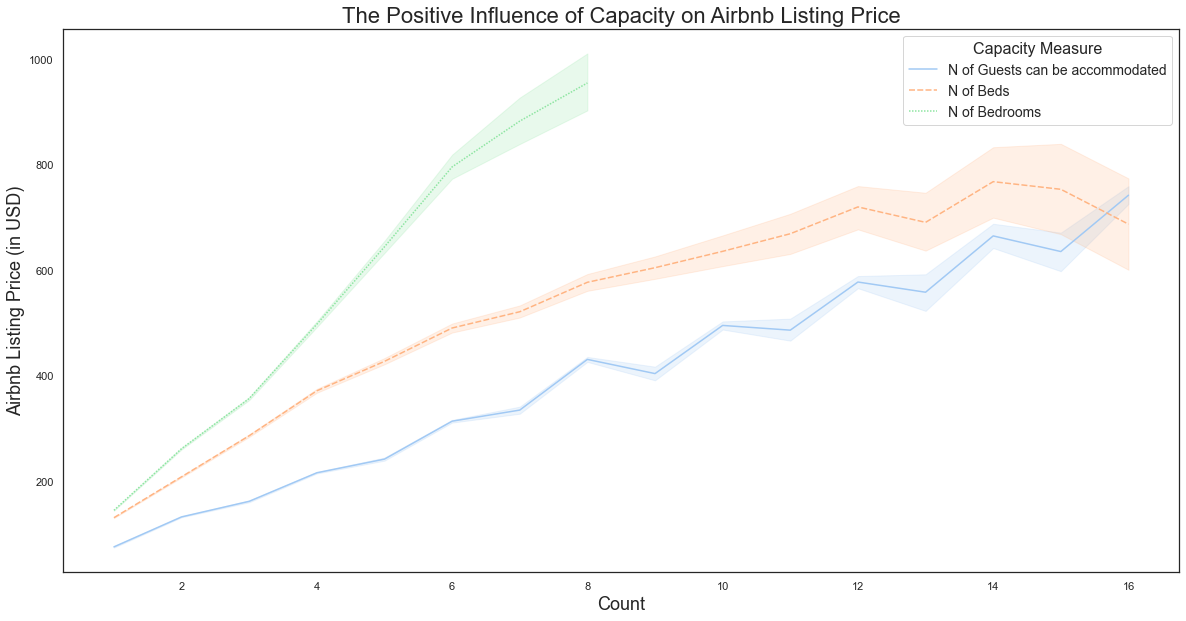

In [778]:
#virsualization for the influence of capacity on price

df_cap = df_master[['price','accommodates','beds','bedrooms']]
df_cap_new = df_cap[(df_cap['beds'] <= 16) & (df_cap['bedrooms'] <= 8)] #create the data for visualization & drop the top 0.1% of outliers

df_cap_new.rename(columns = {'accommodates':'N of Guests can be accommodated', 
                             'beds':'N of Beds',
                             'bedrooms':'N of Bedrooms'} ,inplace = True)

df_cap_melt = pd.melt(df_cap_new, id_vars =['price'], value_vars = ['N of Guests can be accommodated','N of Beds', 'N of Bedrooms'])

df_cap_melt.rename(columns = {'variable': 'Capacity Measure', 'value': 'Count', 'price':'Airbnb Listing Price'}, inplace = True)

plt.figure(figsize = [20,10])

sns.lineplot(data = df_cap_melt, x = 'Count', y = 'Airbnb Listing Price', hue = 'Capacity Measure', style = 'Capacity Measure')

plt.title('The Positive Influence of Capacity on Airbnb Listing Price', fontsize = 22)

plt.xlabel('Count',fontsize = 18)
plt.ylabel('Airbnb Listing Price (in USD)',fontsize = 18)

plt.legend(title = 'Capacity Measure', fontsize = 14, title_fontsize = 16)

plt.savefig('capacity_dif.png')
plt.show()

In [921]:
#virsualization for the influence of rating on price
rating_vars = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_communication',
              'review_scores_cleanliness','review_scores_checkin', 
              'review_scores_location', 'review_scores_value']

df_rating = df_master[['log_price'] + rating_vars] #create the data for visualization & log price is used as this is a regression plot which is sensitive to outliers of the raw price data

df_rating.rename(columns = {'review_scores_rating':'Overall', 'review_scores_accuracy':'Accuracy', 'review_scores_communication':'Communication',
                                 'review_scores_cleanliness': 'Cleanliness','review_scores_checkin':'Checkin', 
                                 'review_scores_location': 'Location', 'review_scores_value': 'Value'} ,inplace = True)

#df_rating_new = df_rating[(df_rating.Overall <= 4) | (df_rating.Accuracy <= 4) | (df_rating.Cleanliness <= 4) | 
                          #(df_rating.Checkin <= 4) | (df_rating.Location <= 4) | (df_rating.Value <= 4)]

df_rating_melt = pd.melt(df_rating, id_vars =['log_price'], value_vars =['Overall','Accuracy','Cleanliness','Checkin','Location','Value','Communication'])


df_rating_melt.rename(columns = {'variable': 'Rating Dimension', 'value': 'Rating Score', 'log_price':'Airbnb Listing Price'}, inplace = True)

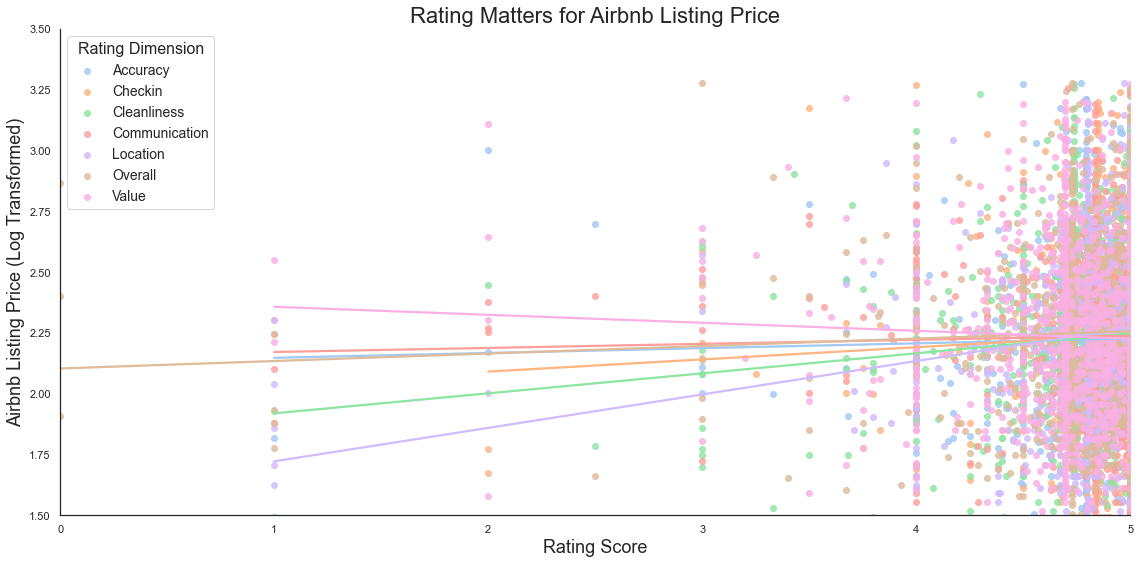

In [948]:
sns.lmplot(data = df_rating_melt.sample(n=7500, replace = False, random_state=1).sort_values(by = ['Rating Dimension']), #use a random sample to creat a neater graph
           x = 'Rating Score', y = 'Airbnb Listing Price', hue = 'Rating Dimension',ci = None, height=8, aspect=2,  legend = False) 

plt.title('Rating Matters for Airbnb Listing Price', fontsize = 22)
plt.xlabel('Rating Score',fontsize = 18)
plt.ylabel('Airbnb Listing Price (Log Transformed)',fontsize = 18)
plt.ylim([1.5,3.5])

plt.legend(title = 'Rating Dimension', fontsize = 14, title_fontsize = 16)

plt.tight_layout()
plt.savefig('rating_dif.png')
plt.show()